### Problem Statement: Life Insurance sales

The dataset belongs to leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for the higher perorming agents and upskill programs for low performing agents.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from math import sqrt
from scipy import stats

In [2]:
# Loading the data
sales = pd.read_excel('Sales.xlsx')

### Basic Exponential Data Analysis

In [3]:
# Check data head
sales.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2     Unmarried        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

In [4]:
# Check data tail
sales.tail()

CustID  AgentBonus   Age  CustTenure Channel      Occupation  \
4515  7004515        3953   4.0         8.0   Agent  Small Business   
4516  7004516        2939   9.0         9.0   Agent        Salaried   
4517  7004517        3792  23.0        23.0   Agent        Salaried   
4518  7004518        4816  10.0        10.0  Online  Small Business   
4519  7004519        4764  14.0        10.0   Agent        Salaried   

      EducationField  Gender  ExistingProdType     Designation  \
4515        Graduate    Male                 4  Senior Manager   
4516  Under Graduate  Female                 2       Executive   
4517        Engineer  Female                 5             AVP   
4518        Graduate  Female                 4       Executive   
4519  Under Graduate  Female                 5         Manager   

      NumberOfPolicy MaritalStatus  MonthlyIncome  Complaint  \
4515             2.0        Single        26355.0          0   
4516             2.0       Married        20991.0          0   
4517             5.0        Single            NaN          0   
4518             2.0        Single        20068.0          0   
4519             2.0       Married        23820.0          0   

      ExistingPolicyTenure  SumAssured   Zone PaymentMethod  LastMonthCalls  \
4515                   2.0    636473.0   West        Yearly               9   
4516                   3.0    296813.0  North        Yearly               1   
4517                   2.0    667371.0  North   Half Yearly               4   
4518                   6.0    943999.0   West   Half Yearly               1   
4519                   3.0    700308.0  North   Half Yearly               1   

      CustCareScore  
4515            1.0  
4516            3.0  
4517            1.0  
4518            5.0  
4519            3.0

In [5]:
# Check data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [6]:
# Check shape of the dataset
sales.shape

(4520, 20)

There are total no. of 4520 rows and 20 columns in the dataset.

In [7]:
# Check data summary
sales.describe().transpose

<bound method DataFrame.transpose of              CustID   AgentBonus          Age   CustTenure  ExistingProdType  \
count  4.520000e+03  4520.000000  4251.000000  4294.000000       4520.000000   
mean   7.002260e+06  4077.838274    14.494707    14.469027          3.688938   
std    1.304956e+03  1403.321711     9.037629     8.963671          1.015769   
min    7.000000e+06  1605.000000     2.000000     2.000000          1.000000   
25%    7.001130e+06  3027.750000     7.000000     7.000000          3.000000   
50%    7.002260e+06  3911.500000    13.000000    13.000000          4.000000   
75%    7.003389e+06  4867.250000    20.000000    20.000000          4.000000   
max    7.004519e+06  9608.000000    58.000000    57.000000          6.000000   

       NumberOfPolicy  MonthlyIncome    Complaint  ExistingPolicyTenure  \
count     4475.000000    4284.000000  4520.000000           4336.000000   
mean         3.565363   22890.309991     0.287168              4.130074   
std          1.45

In [8]:
# Check missing values
sales.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [9]:
# Checking for duplicate values

dups = sales.duplicated()
print('The total no of duplicate vaules = %d' % (dups.sum()))
sales[dups]

The total no of duplicate vaules = 0


Empty DataFrame
Columns: [CustID, AgentBonus, Age, CustTenure, Channel, Occupation, EducationField, Gender, ExistingProdType, Designation, NumberOfPolicy, MaritalStatus, MonthlyIncome, Complaint, ExistingPolicyTenure, SumAssured, Zone, PaymentMethod, LastMonthCalls, CustCareScore]
Index: []

#### Label Encoding for Categorical variables

In [10]:
# Since we are quite aware that label_encoder object knows how to understand word labels.
# As we are trying to convert the labels into numeric form so as to convert them to machine readable form.

label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
sales['Channel']= label_encoder.fit_transform(sales['Channel'])
sales['Occupation']= label_encoder.fit_transform(sales['Occupation'])
sales['EducationField']= label_encoder.fit_transform(sales['EducationField'])
sales['Gender']= label_encoder.fit_transform(sales['Gender'])
sales['Designation']= label_encoder.fit_transform(sales['Designation'])
sales['MaritalStatus']= label_encoder.fit_transform(sales['MaritalStatus'])
sales['Zone']= label_encoder.fit_transform(sales['Zone'])
sales['PaymentMethod']= label_encoder.fit_transform(sales['PaymentMethod'])

In [11]:
# Check null values 
sales.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [12]:
# Imputing missing values with 'mean' and 'mode'

model1=sales['Age'].mode()[0]
model2=sales['CustTenure'].mode()[0]
model3=sales['MonthlyIncome'].mean()
model4=sales['ExistingPolicyTenure'].mode()[0]
model5=sales['SumAssured'].mean()
model6=sales['CustCareScore'].mode()[0]
model7=sales['NumberOfPolicy'].mode()[0]
sales['Age'].replace(np.nan,model1,inplace=True)
sales['CustTenure'].replace(np.nan,model2,inplace=True)
sales['MonthlyIncome'].replace(np.nan,model3,inplace=True)
sales['ExistingPolicyTenure'].replace(np.nan,model4,inplace=True)
sales['SumAssured'].replace(np.nan,model5,inplace=True)
sales['CustCareScore'].replace(np.nan,model6,inplace=True)
sales['NumberOfPolicy'].replace(np.nan,model7,inplace=True)

In [13]:
# Check null values again
sales.isnull().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

Null values has been properly taken care of

In [14]:
# Check duplicate values again
sales.duplicated().sum()

0

No duplicate values either.

### Univariate Analysis

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

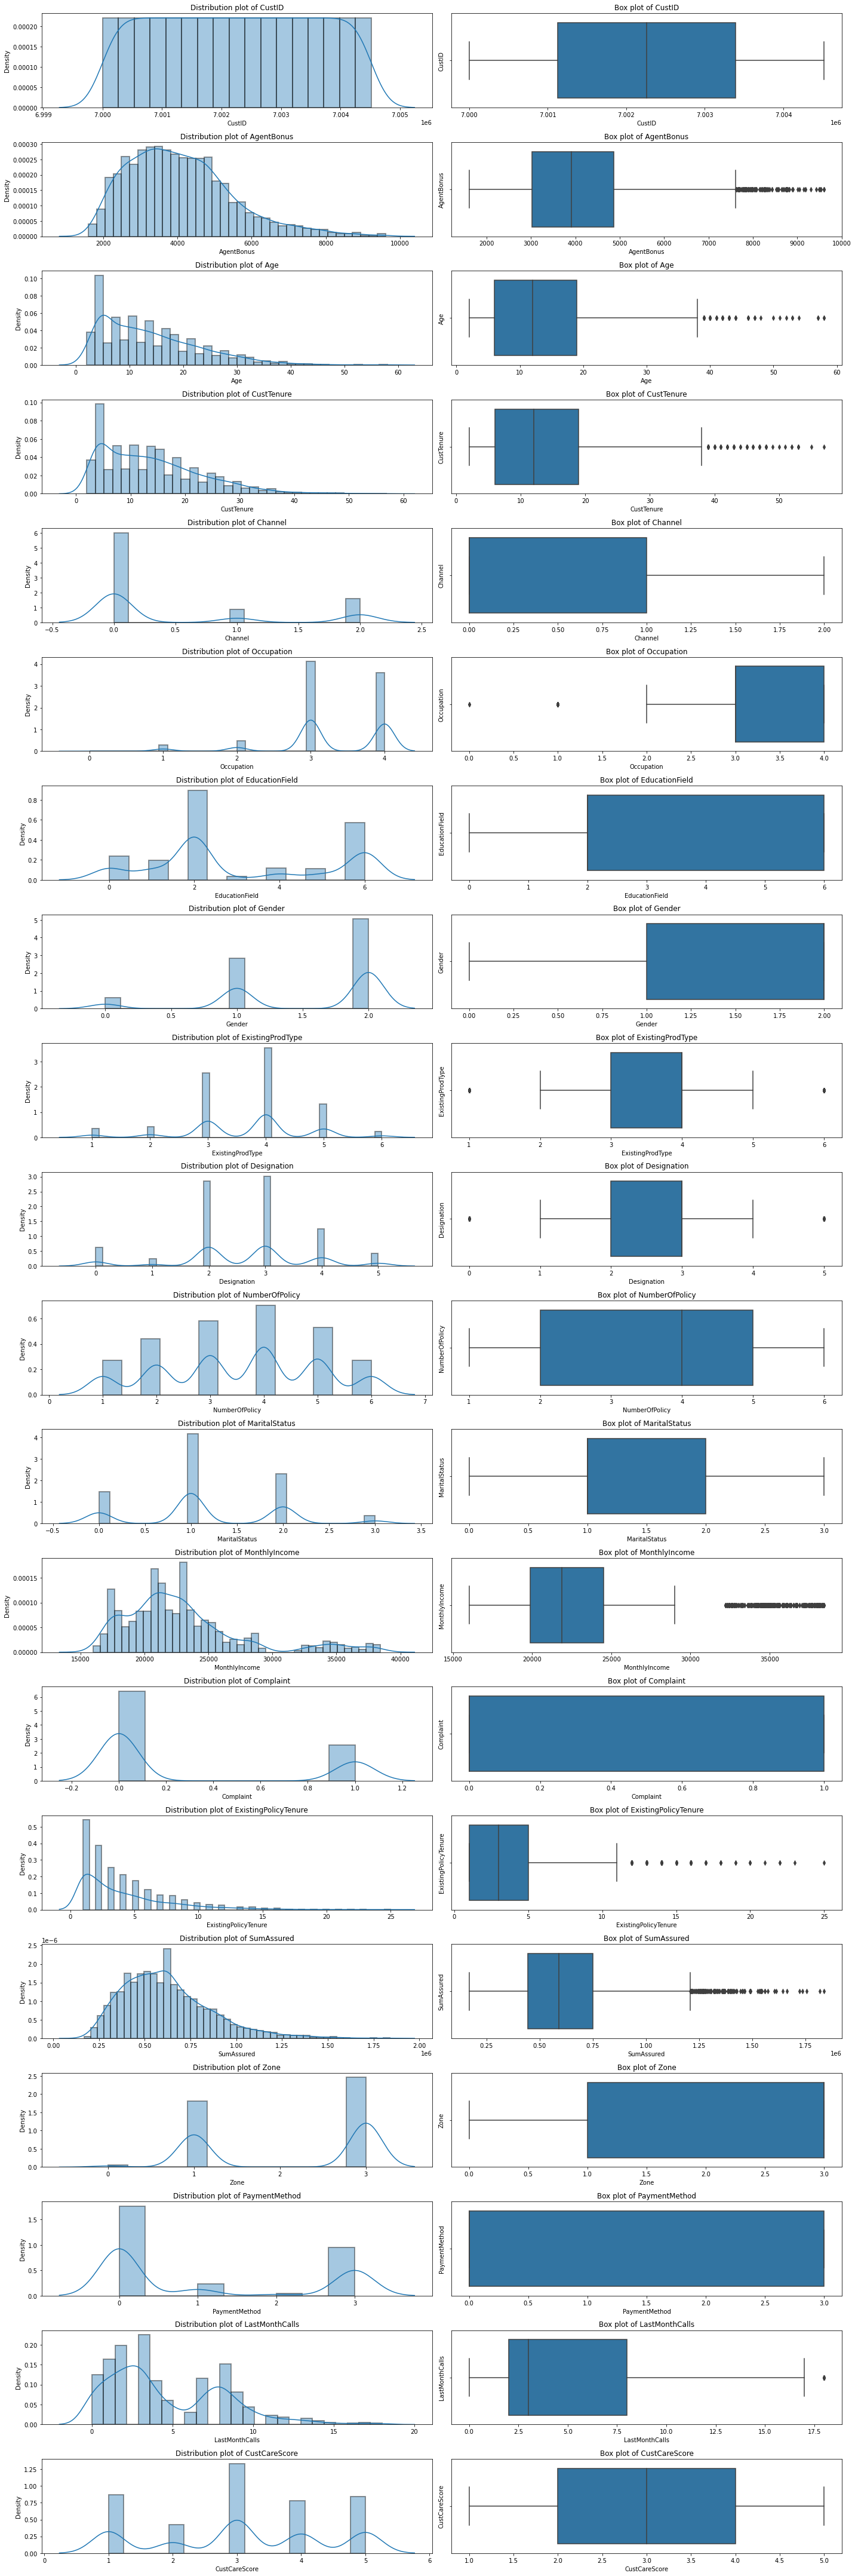

In [15]:
a = len(sales.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,60))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()

#### Below are the Summary of the variables which has Outliers.

In [16]:
sales.describe()['AgentBonus']

count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64

In [17]:
sales.describe()['Age']

count    4520.000000
mean       13.929646
std         9.047851
min         2.000000
25%         6.000000
50%        12.000000
75%        19.000000
max        58.000000
Name: Age, dtype: float64

In [18]:
sales.describe()['CustTenure']

count    4520.000000
mean       13.945575
std         9.029746
min         2.000000
25%         6.000000
50%        12.000000
75%        19.000000
max        57.000000
Name: CustTenure, dtype: float64

In [19]:
sales.describe()['SumAssured']

count    4.520000e+03
mean     6.199997e+05
std      2.420028e+05
min      1.685360e+05
25%      4.444762e+05
50%      5.900125e+05
75%      7.500105e+05
max      1.838496e+06
Name: SumAssured, dtype: float64

In [20]:
sales.describe()['MonthlyIncome']

count     4520.000000
mean     22890.309991
std       4756.317536
min      16009.000000
25%      19858.000000
50%      21877.000000
75%      24531.750000
max      38456.000000
Name: MonthlyIncome, dtype: float64

In [21]:
sales.describe()['ExistingPolicyTenure']

count    4520.000000
mean        4.002655
std         3.335419
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        25.000000
Name: ExistingPolicyTenure, dtype: float64

We found outliers in some of the variables , and we are going to remove them.

In [22]:
# Treating Outliers

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in sales.columns:
    lr,ur=remove_outlier(sales[column])
    sales[column]=np.where(sales[column]>ur,ur,sales[column])
    sales[column]=np.where(sales[column]<lr,lr,sales[column])

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sangam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

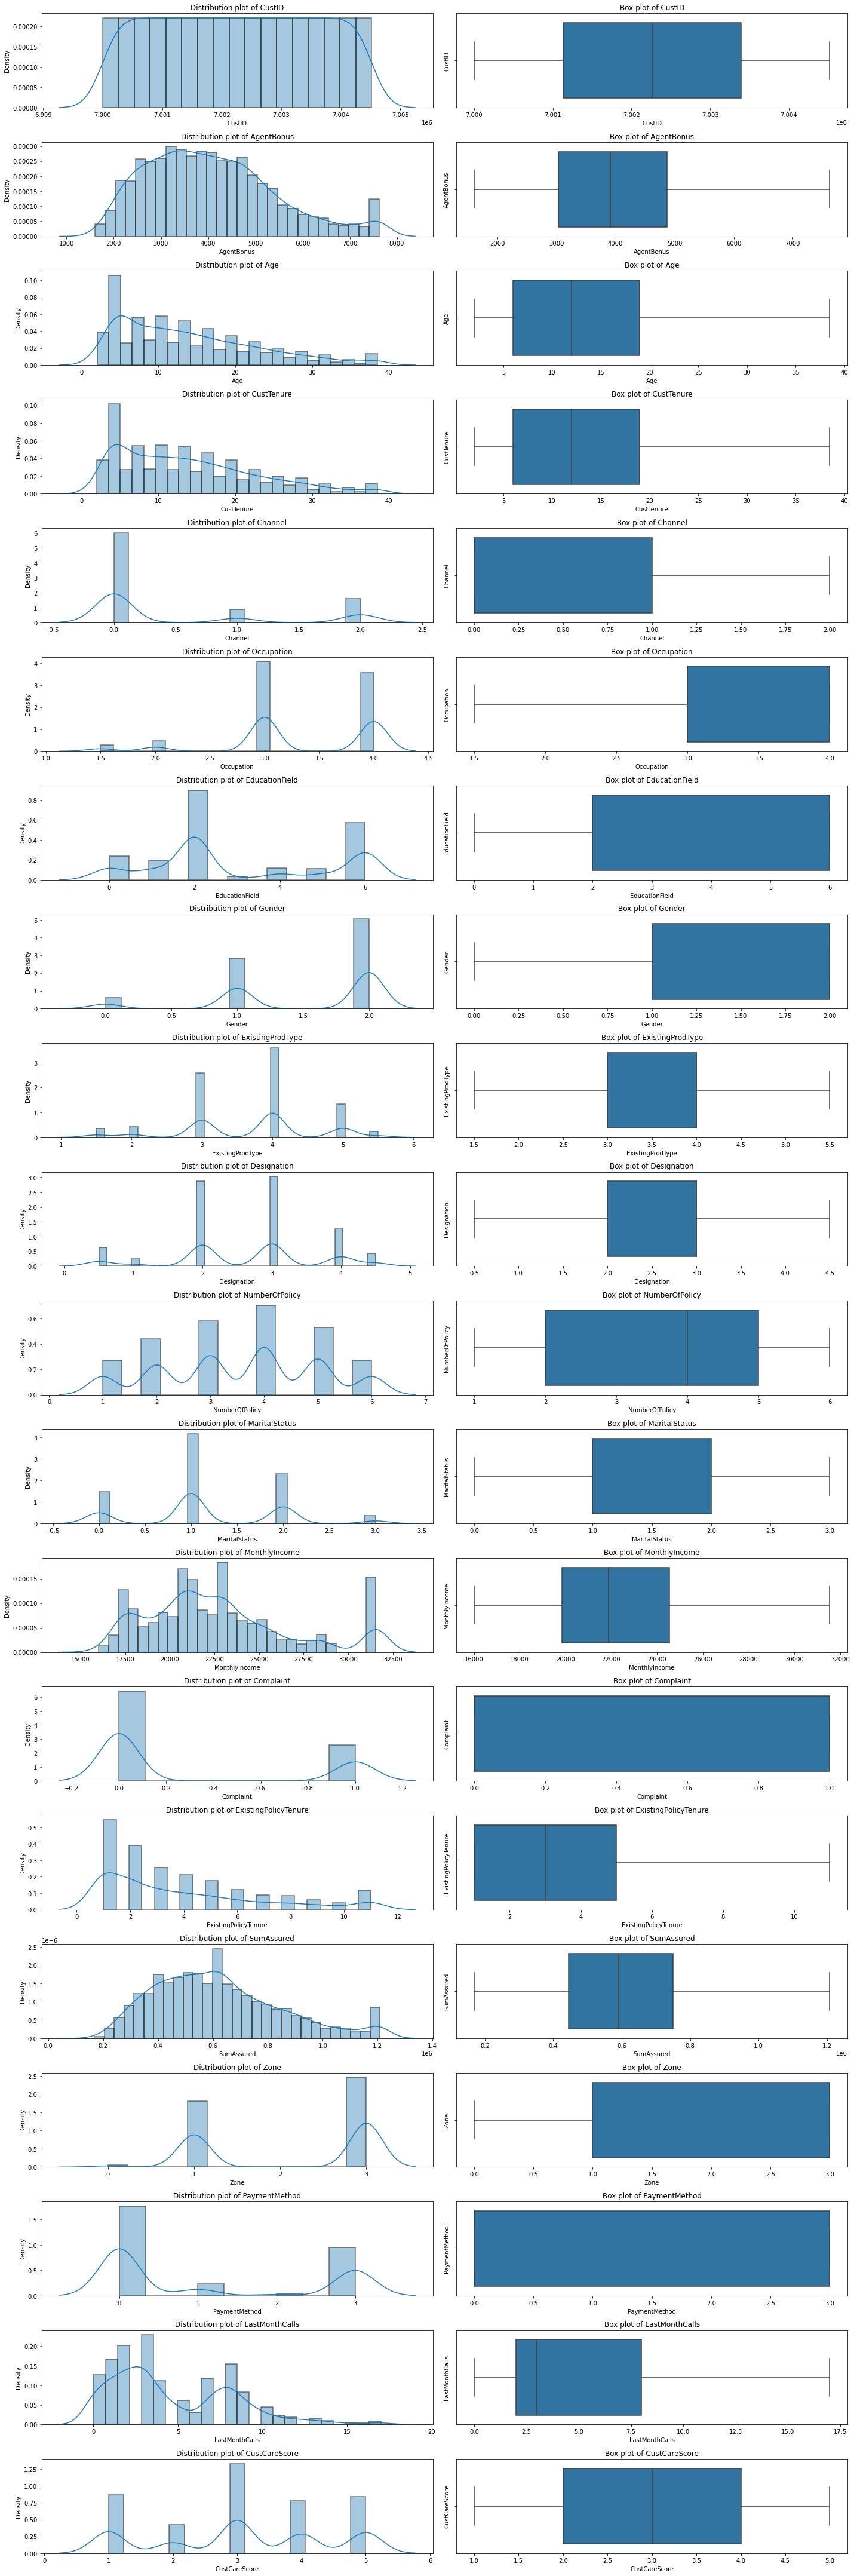

In [24]:
# Replotting the graphs to check if the Outliers has been treated.

a = len(sales.select_dtypes(exclude= 'object').columns)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,60))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()


We can see that the Outliers has been treated successfully using IQR

### Bivariate Analysis

In [25]:
# let's check the summary of Agentbonus first.
sales.describe()['AgentBonus']

count    4520.000000
mean     4062.773894
std      1358.284526
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      7626.500000
Name: AgentBonus, dtype: float64

<AxesSubplot:xlabel='AgentBonus', ylabel='Age'>

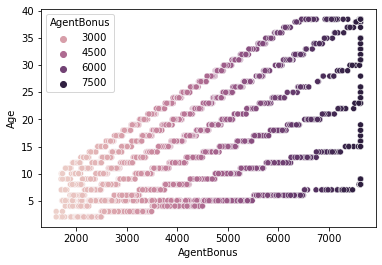

In [26]:
# Now using the scatterplots describing it.
sns.scatterplot(x='AgentBonus',y='Age',data=sales,hue='AgentBonus')

#### Checking Correlation using Heat map

In [27]:
Corr_Matrix = sales.corr()
print(Corr_Matrix)

                        CustID  AgentBonus       Age  CustTenure   Channel  \
CustID                1.000000    0.194469  0.137151    0.153822 -0.003346   
AgentBonus            0.194469    1.000000  0.560300    0.559312 -0.035635   
Age                   0.137151    0.560300  1.000000    0.331396 -0.026437   
CustTenure            0.153822    0.559312  0.331396    1.000000 -0.036903   
Channel              -0.003346   -0.035635 -0.026437   -0.036903  1.000000   
Occupation            0.002776    0.024176  0.015726    0.027638  0.007956   
EducationField        0.018621    0.008868  0.004500    0.006645  0.017410   
Gender                0.085549    0.043575  0.022354    0.037631 -0.013682   
ExistingProdType      0.426252    0.112871  0.098994    0.113379  0.005767   
Designation           0.023020    0.153557  0.120095    0.109045 -0.000582   
NumberOfPolicy        0.254446    0.079161  0.065757    0.061891 -0.018514   
MaritalStatus         0.077783   -0.084234 -0.057079   -0.065455

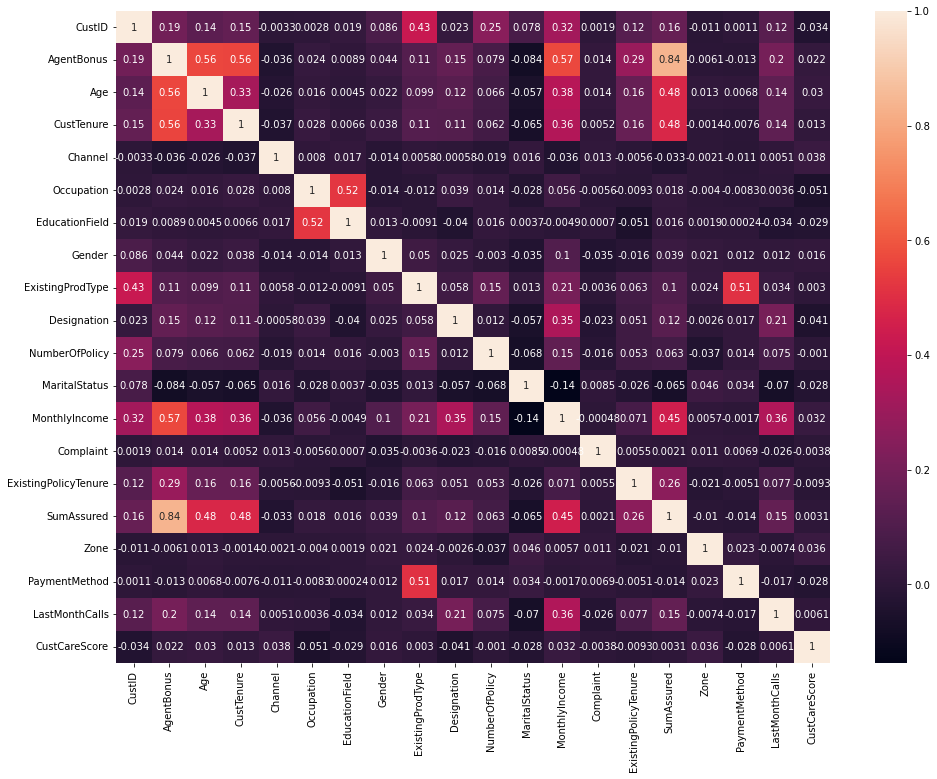

In [28]:
plt.figure(figsize=(16,12))
sns.heatmap(sales.corr(), annot=True)
plt.show()

### Bivariate Analysis using Target variable

#### Examining all variables in the dataset

In [29]:
sales.describe()["Age"]

count    4520.000000
mean       13.855863
std         8.800660
min         2.000000
25%         6.000000
50%        12.000000
75%        19.000000
max        38.500000
Name: Age, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

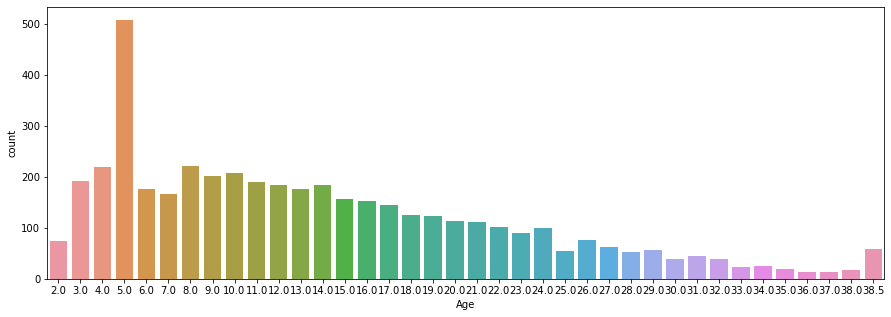

In [30]:
# Plotting the graphs for the same

plt.figure(figsize=(15,5))
sns.countplot(sales['Age'])

In [31]:
# Describing the Customer tenure
sales.describe()["CustTenure"]

count    4520.000000
mean       13.865265
std         8.765148
min         2.000000
25%         6.000000
50%        12.000000
75%        19.000000
max        38.500000
Name: CustTenure, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustTenure', ylabel='count'>

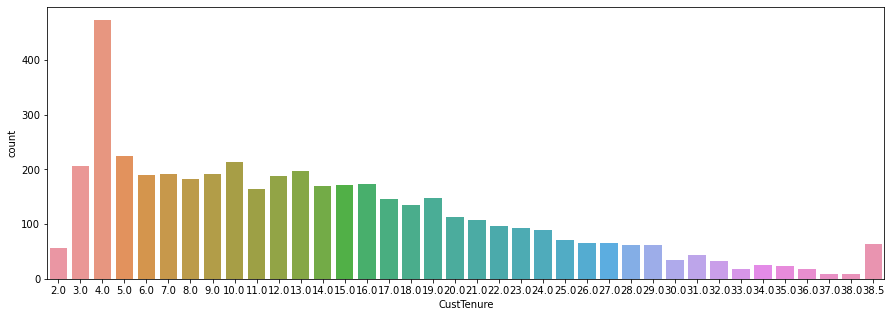

In [32]:
# Plotting the graph for the same variable 'Customer tenure'

plt.figure(figsize=(15,5))
sns.countplot(sales['CustTenure'])

In [33]:
# Describing the Zonal area of population
sales.describe()["Zone"]

count    4520.000000
mean        2.122566
std         1.013092
min         0.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Zone, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Zone', ylabel='count'>

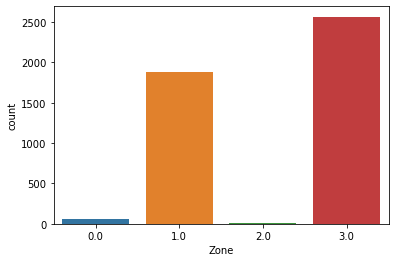

In [34]:
# Plotting the graphs for the same variable 'zone'

plt.figure(figsize=(6,4))
sns.countplot(sales['Zone'])

In [35]:
# Describing the 'Channel' variable
sales.describe()["Channel"]

count    4520.000000
mean        0.483186
std         0.793412
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Channel, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='count'>

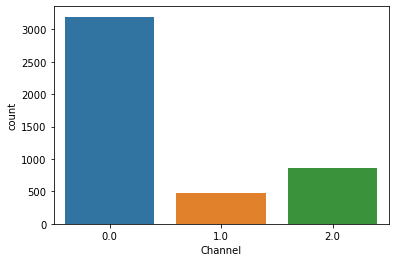

In [36]:
# Ploting the countplots for the same variable.

plt.figure(figsize=(6,4))
sns.countplot(sales["Channel"])

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

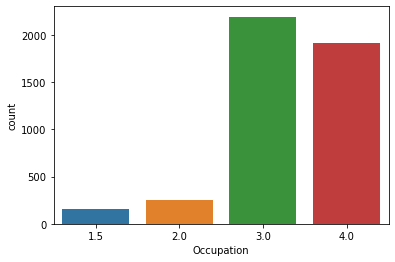

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(sales["Occupation"])

In [38]:
# Describing the payment method variable
sales.describe()['PaymentMethod']

count    4520.000000
mean        1.063717
std         1.367408
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max         3.000000
Name: PaymentMethod, dtype: float64

C:\Users\sangam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


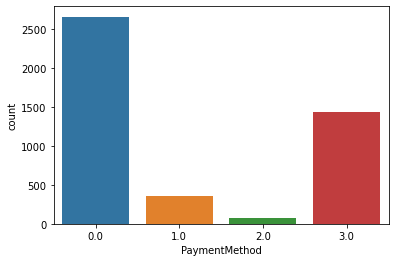

In [39]:
# Ploting the graphs using countplots to show the same whether they are going for yearly payment or half yearly.

plt.figure(figsize=(6,4))
sns.countplot(sales['PaymentMethod'])
labels = ["Half Yearly 0","Monthly 1"]

In [40]:
# Describing the 'Existing product type' variable
sales.describe()["ExistingProdType"]

count    4520.000000
mean        3.695575
std         0.936418
min         1.500000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.500000
Name: ExistingProdType, dtype: float64

#### Clustering using K Means Clustering

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
X=StandardScaler()

In [43]:
scaled_sales = X.fit_transform(sales)

In [44]:
# Scaled data are now below:-
scaled_sales

array([[-1.73166765,  0.25492775,  0.92550313, ..., -0.77799336,
         0.104054  , -0.7759467 ],
       [-1.73090126, -1.36126003, -0.32454144, ...,  1.41618093,
         0.65802815, -0.04859724],
       [-1.73013486,  0.15479037,  1.38006478, ...,  1.41618093,
        -1.28088139, -0.04859724],
       ...,
       [ 1.73013486, -0.19937196,  1.03914354, ..., -0.77799336,
        -0.17293308, -1.50329615],
       [ 1.73090126,  0.55460357, -0.43818185, ..., -0.77799336,
        -1.00389432,  1.40610167],
       [ 1.73166765,  0.51631575,  0.01637981, ..., -0.77799336,
        -1.00389432, -0.04859724]])

In [45]:
k_means = KMeans(n_clusters=2)

In [46]:
# fitting the scaled data
k_means.fit(scaled_sales)

KMeans(n_clusters=2)

In [47]:
# Checking the labels
k_means.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
# Checking inertia
k_means.inertia_

80017.97762049144

In [49]:
# Now doing K_means using different clusterrs.

k_means=KMeans(n_clusters=2)
k_means.fit(scaled_sales)
k_means.inertia_

80018.01656307669

In [50]:
# Now doing K_means using cluster = 3

k_means=KMeans(n_clusters=3)
k_means.fit(scaled_sales)
k_means.inertia_

75801.64095865202

In [51]:
# Similarly using cluster = 4

k_means=KMeans(n_clusters=4)
k_means.fit(scaled_sales)
k_means.inertia_

72858.99311114934

In [52]:
wss=[]

In [53]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_sales)
    wss.append(KM.inertia_)

In [54]:
wss

[90399.99999999994,
 80018.01711785904,
 75801.46675303084,
 72860.7431125239,
 70763.22912115385,
 69037.62204894409,
 67524.00183649888,
 65834.55612702842,
 64707.97539717608,
 63572.67745876036]

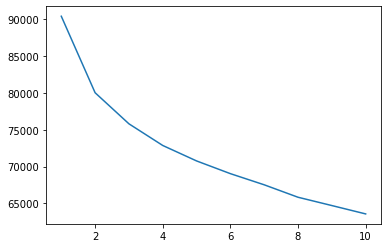

In [55]:
plt.plot(range(1,11),wss)

In [56]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_sales)
labels=k_means.labels_

In [57]:
sales['Clus_kmeans'] = labels
sales.head(10)

CustID  AgentBonus   Age  CustTenure  Channel  Occupation  \
0  7000000.0      4409.0  22.0         4.0      0.0         3.0   
1  7000001.0      2214.0  11.0         2.0      2.0         3.0   
2  7000002.0      4273.0  26.0         4.0      0.0         1.5   
3  7000003.0      1791.0  11.0         4.0      2.0         3.0   
4  7000004.0      2955.0   6.0         4.0      0.0         4.0   
5  7000005.0      3252.0   7.0         4.0      2.0         3.0   
6  7000006.0      3850.0  12.0        23.0      0.0         3.0   
7  7000007.0      2073.0   6.0         4.0      0.0         4.0   
8  7000008.0      2719.0   8.0        11.0      0.0         3.0   
9  7000009.0      3247.0   6.0         3.0      1.0         4.0   

   EducationField  Gender  ExistingProdType  Designation  ...  MaritalStatus  \
0             2.0     1.0               3.0          3.0  ...            2.0   
1             2.0     2.0               4.0          3.0  ...            0.0   
2             4.0     2.0               4.0          1.0  ...            3.0   
3             2.0     0.0               3.0          2.0  ...            0.0   
4             5.0     2.0               3.0          2.0  ...            0.0   
5             2.0     2.0               3.0          2.0  ...            2.0   
6             2.0     2.0               4.0          4.5  ...            0.0   
7             6.0     1.0               3.0          2.0  ...            3.0   
8             2.0     2.0               4.0          3.0  ...            0.0   
9             6.0     2.0               2.0          1.0  ...            1.0   

   MonthlyIncome  Complaint  ExistingPolicyTenure     SumAssured  Zone  \
0      20993.000        1.0                   2.0  806761.000000   1.0   
1      20130.000        0.0                   3.0  294502.000000   1.0   
2      17090.000        1.0                   2.0  619999.699267   1.0   
3      17909.000        1.0                   2.0  268635.000000   3.0   
4      18468.000        0.0                   4.0  366405.000000   3.0   
5      18068.000        0.0                   2.0  487836.000000   1.0   
6      31542.375        0.0                   2.0  392689.000000   1.0   
7      17279.000        0.0                   2.0  369079.000000   3.0   
8      20916.000        1.0                   1.0  405143.000000   3.0   
9      17089.000        0.0                   1.0  619999.699267   3.0   

   PaymentMethod  LastMonthCalls  CustCareScore  Clus_kmeans  
0            0.0             5.0            2.0            0  
1            3.0             7.0            3.0            2  
2            3.0             0.0            3.0            2  
3            0.0             0.0            5.0            0  
4            0.0             2.0            5.0            0  
5            0.0             6.0            5.0            0  
6            3.0             9.0            2.0            2  
7            0.0             3.0            3.0            0  
8            3.0             1.0            4.0            2  
9            2.0             2.0            4.0            0  

[10 rows x 21 columns]

In [58]:
# Again Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import seaborn 
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Reading the dataset again
sales = pd.read_excel('Sales.xlsx')

In [60]:
# Check data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [61]:
# Check Data summary
sales.describe().T

count          mean            std        min  \
CustID                4520.0  7.002260e+06    1304.955938  7000000.0   
AgentBonus            4520.0  4.077838e+03    1403.321711     1605.0   
Age                   4251.0  1.449471e+01       9.037629        2.0   
CustTenure            4294.0  1.446903e+01       8.963671        2.0   
ExistingProdType      4520.0  3.688938e+00       1.015769        1.0   
NumberOfPolicy        4475.0  3.565363e+00       1.455926        1.0   
MonthlyIncome         4284.0  2.289031e+04    4885.600757    16009.0   
Complaint             4520.0  2.871681e-01       0.452491        0.0   
ExistingPolicyTenure  4336.0  4.130074e+00       3.346386        1.0   
SumAssured            4366.0  6.199997e+05  246234.822140   168536.0   
LastMonthCalls        4520.0  4.626991e+00       3.620132        0.0   
CustCareScore         4468.0  3.067592e+00       1.382968        1.0   

                             25%        50%         75%        max  
CustID                7001129.75  7002259.5  7003389.25  7004519.0  
AgentBonus               3027.75     3911.5     4867.25     9608.0  
Age                         7.00       13.0       20.00       58.0  
CustTenure                  7.00       13.0       20.00       57.0  
ExistingProdType            3.00        4.0        4.00        6.0  
NumberOfPolicy              2.00        4.0        5.00        6.0  
MonthlyIncome           19683.50    21606.0    24725.00    38456.0  
Complaint                   0.00        0.0        1.00        1.0  
ExistingPolicyTenure        2.00        3.0        6.00       25.0  
SumAssured             439443.25   578976.5   758236.00  1838496.0  
LastMonthCalls              2.00        3.0        8.00       18.0  
CustCareScore               2.00        3.0        4.00        5.0

In [62]:
# Check data type
sales.dtypes

CustID                    int64
AgentBonus                int64
Age                     float64
CustTenure              float64
Channel                  object
Occupation               object
EducationField           object
Gender                   object
ExistingProdType          int64
Designation              object
NumberOfPolicy          float64
MaritalStatus            object
MonthlyIncome           float64
Complaint                 int64
ExistingPolicyTenure    float64
SumAssured              float64
Zone                     object
PaymentMethod            object
LastMonthCalls            int64
CustCareScore           float64
dtype: object

In [63]:
# Check null value
sales.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [64]:
# Treating missing values again

model1=sales['Age'].mode()[0]
model2=sales['CustTenure'].mode()[0]
model3=sales['MonthlyIncome'].mean()
model4=sales['ExistingPolicyTenure'].mode()[0]
model5=sales['SumAssured'].mean()
model6=sales['CustCareScore'].mode()[0]
model7=sales['NumberOfPolicy'].mode()[0]
sales['Age'].replace(np.nan,model1,inplace=True)
sales['CustTenure'].replace(np.nan,model2,inplace=True)
sales['MonthlyIncome'].replace(np.nan,model3,inplace=True)
sales['ExistingPolicyTenure'].replace(np.nan,model4,inplace=True)
sales['SumAssured'].replace(np.nan,model5,inplace=True)
sales['CustCareScore'].replace(np.nan,model6,inplace=True)
sales['NumberOfPolicy'].replace(np.nan,model7,inplace=True)

In [65]:
# Check missing values
sales.isnull().any()

CustID                  False
AgentBonus              False
Age                     False
CustTenure              False
Channel                 False
Occupation              False
EducationField          False
Gender                  False
ExistingProdType        False
Designation             False
NumberOfPolicy          False
MaritalStatus           False
MonthlyIncome           False
Complaint               False
ExistingPolicyTenure    False
SumAssured              False
Zone                    False
PaymentMethod           False
LastMonthCalls          False
CustCareScore           False
dtype: bool

In [66]:
# Check duplicate values for the same
sales.duplicated().sum()

0

### Univariate Analysis

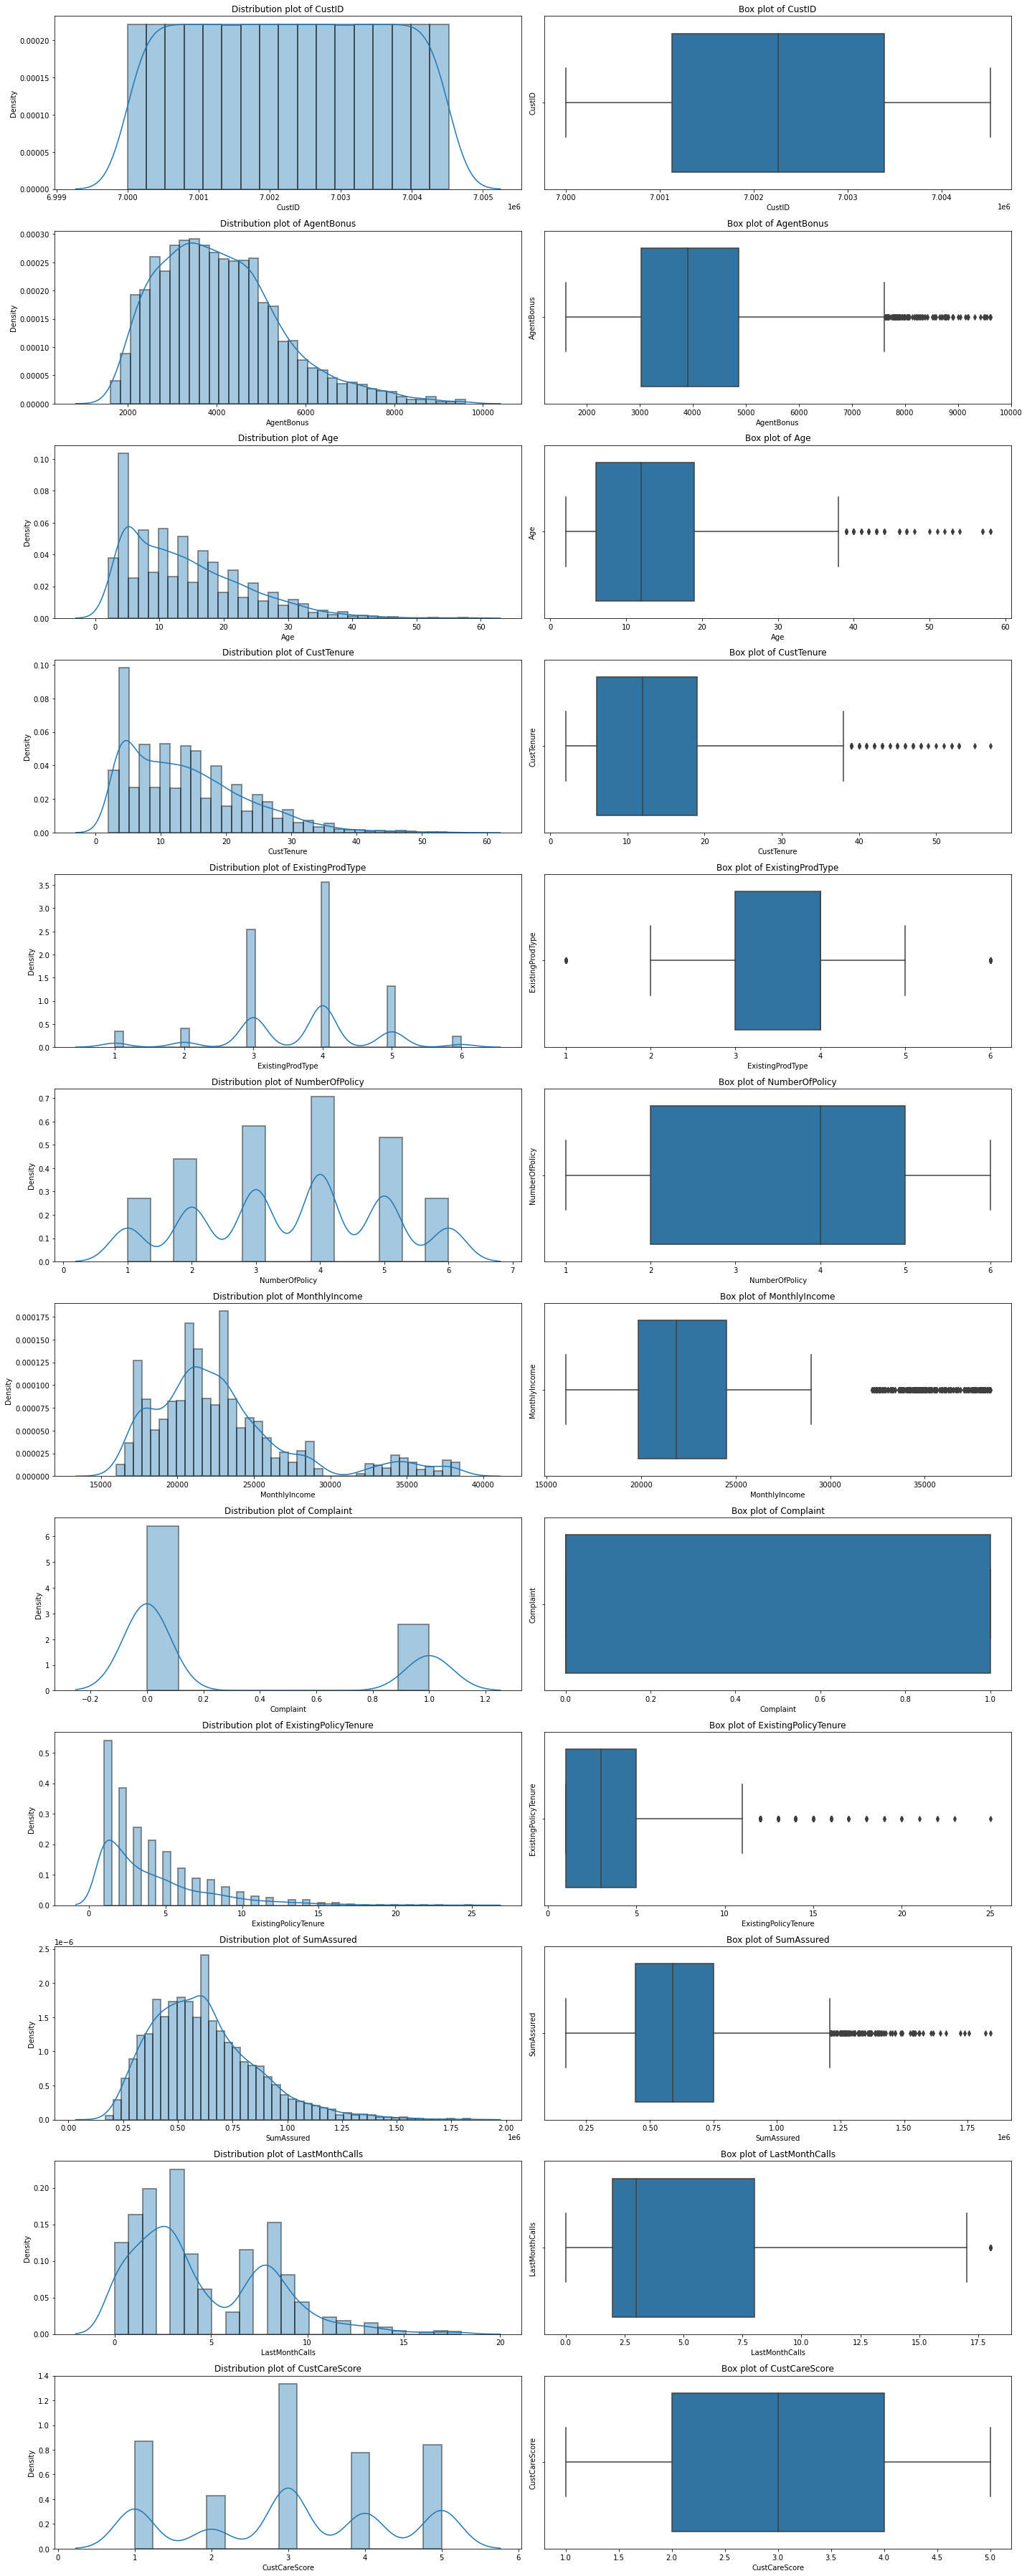

In [67]:
a = len(sales.select_dtypes(exclude= 'object').columns)  # represents number of rows
b = 2  # represents number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,50))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()

In [68]:
# Total no. of numerical columns objective variables

sales_cat = sales.select_dtypes(include = ['object'])
lstcategoriccolumns = list(sales_cat.columns.values)
columnlen=len(lstcategoriccolumns)
print("Total no. of numerical columns = ",columnlen)

Total no. of numerical columns =  8


In [69]:
# Total no. of numerical columns (floats and integers)

sales_num = sales.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(sales_num.columns.values)
columnlen=len(lstnumericcolumns)
print("Total no. of numerical columns = ",columnlen)

Total no. of numerical columns =  12


### Outliers Treatment

In [70]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [71]:
for column in sales_num.columns:
    lr,ur=remove_outlier(sales[column])
    sales[column]=np.where(sales[column]>ur,ur,sales[column])
    sales[column]=np.where(sales[column]<lr,lr,sales[column])

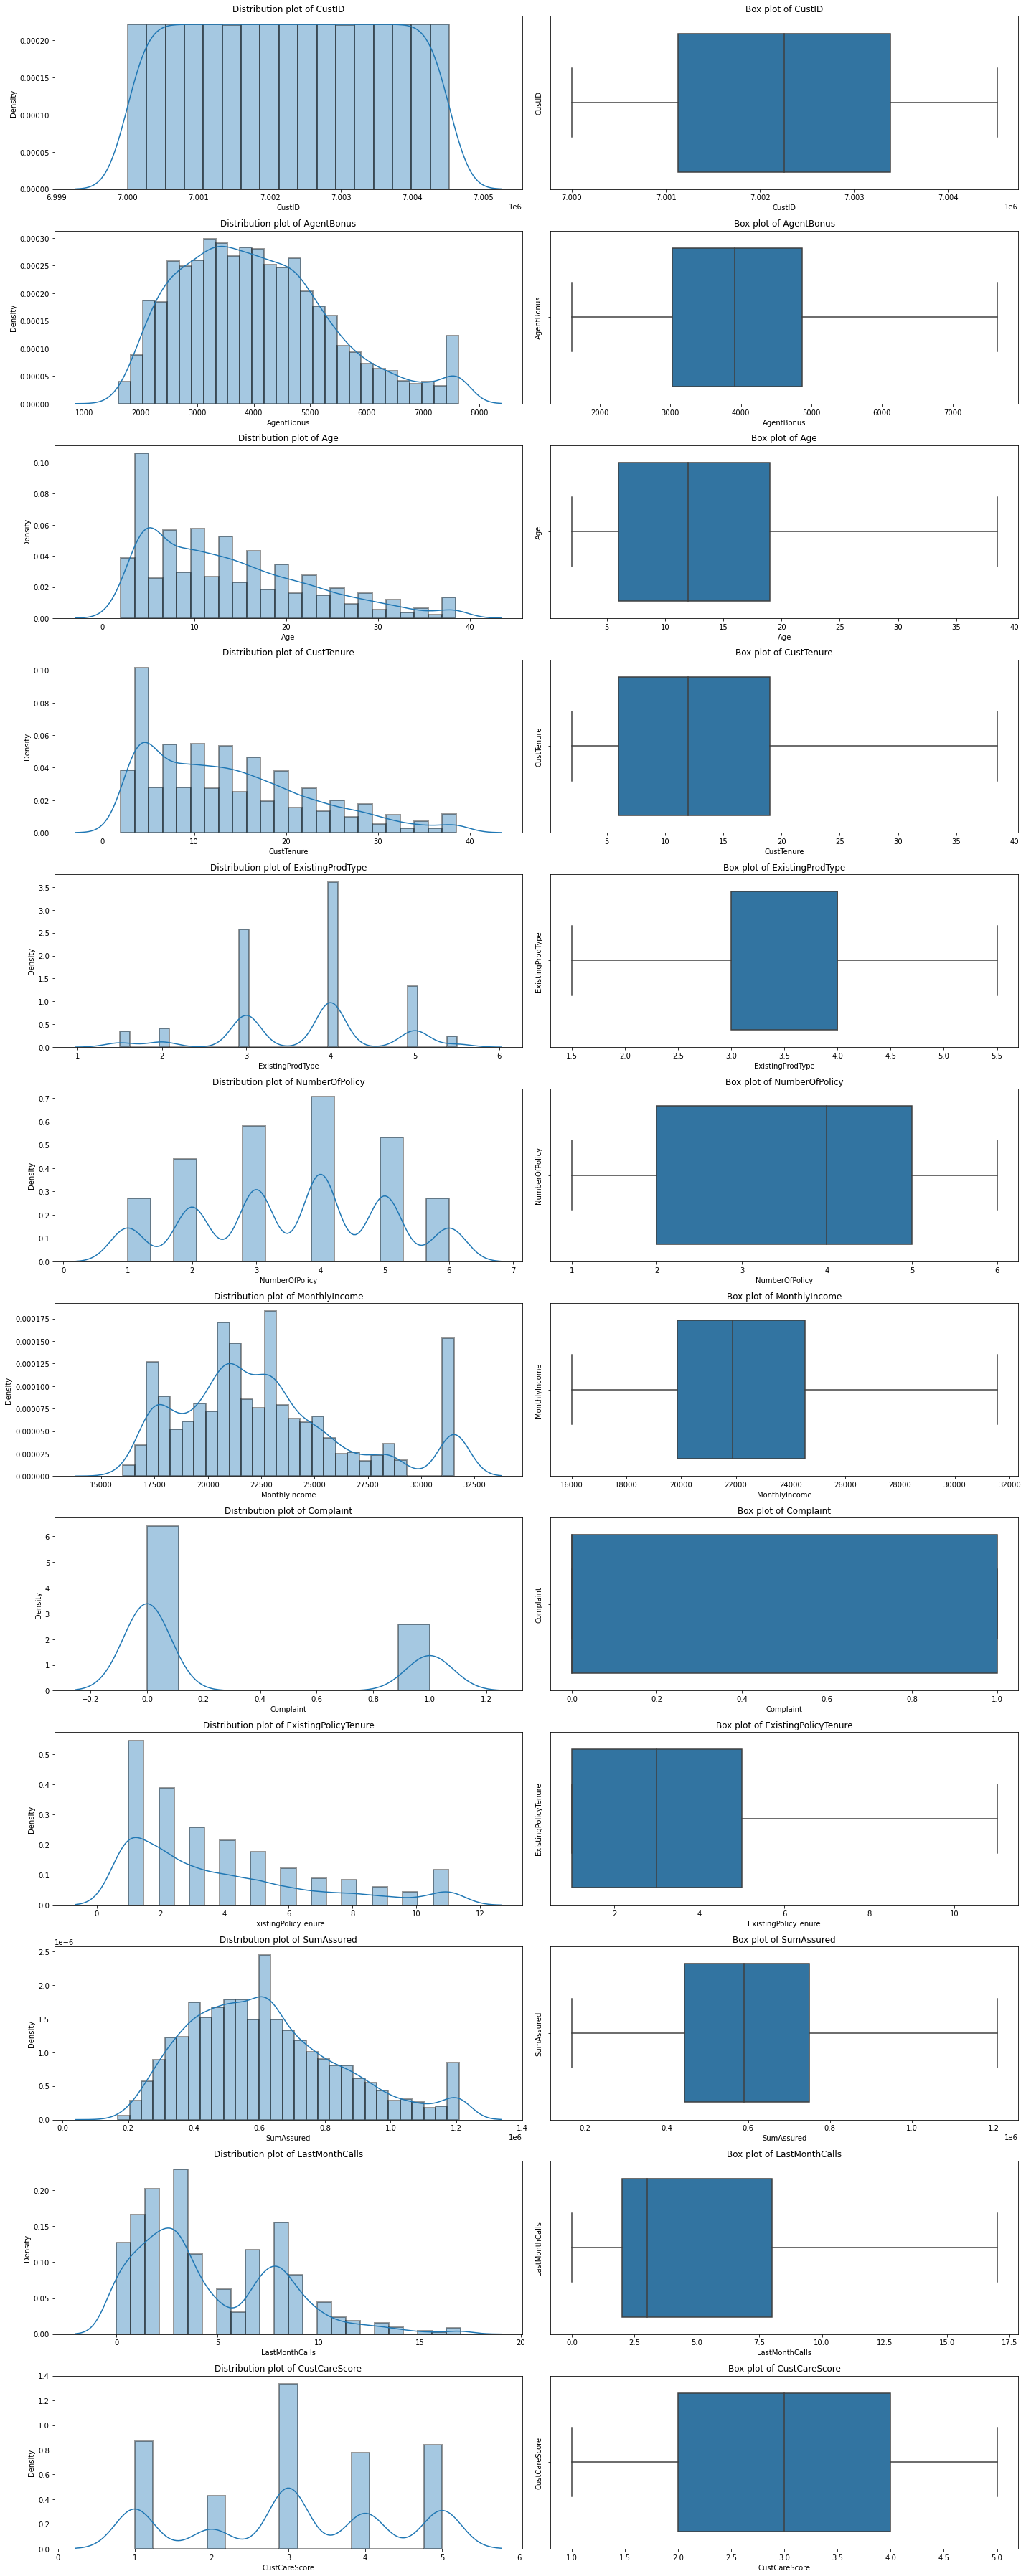

In [72]:
# Check if Outliers has been treated 

a = len(sales.select_dtypes(exclude= 'object').columns)  # represents number of rows
b = 2  # represents number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,50))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.distplot(sales[i], hist_kws=dict(edgecolor="k", linewidth=2))
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Box plot of {}'.format(i))
    plt.ylabel(i)
    sns.boxplot(x = sales[i], orient='h', palette='tab10')
    c = c + 1

plt.tight_layout()
plt.show()

In [73]:
# Total no. of numerical columns objective variables

sales_cat = sales.select_dtypes(include = ['object'])
lstcategoriccolumns = list(sales_cat.columns.values)
columnlen=len(lstcategoriccolumns)
print("Total no. of numerical columns = ",columnlen)

Total no. of numerical columns =  8


In [74]:
# Total no. of numerical columns (floats and integers)

sales_num = sales.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(sales_num.columns.values)
columnlen=len(lstnumericcolumns)
print("Total no. of numerical columns = ",columnlen)

Total no. of numerical columns =  12


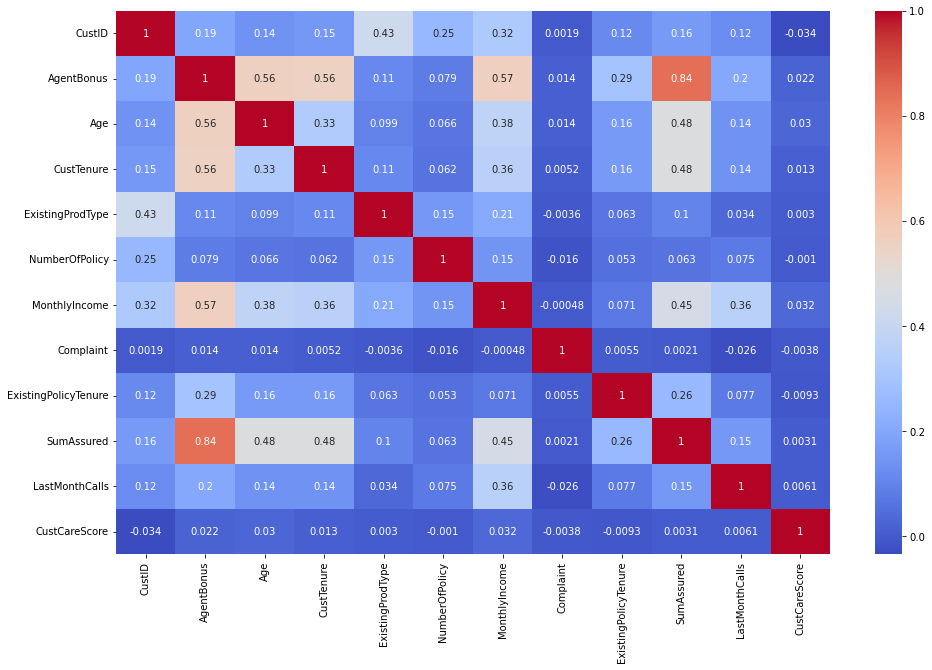

In [75]:
# Now checking for Correlations using Heatmap

plt.figure(figsize = (16,10))
sns.heatmap(sales.corr(), annot=True, cmap='coolwarm');

### Bivariate Analysis

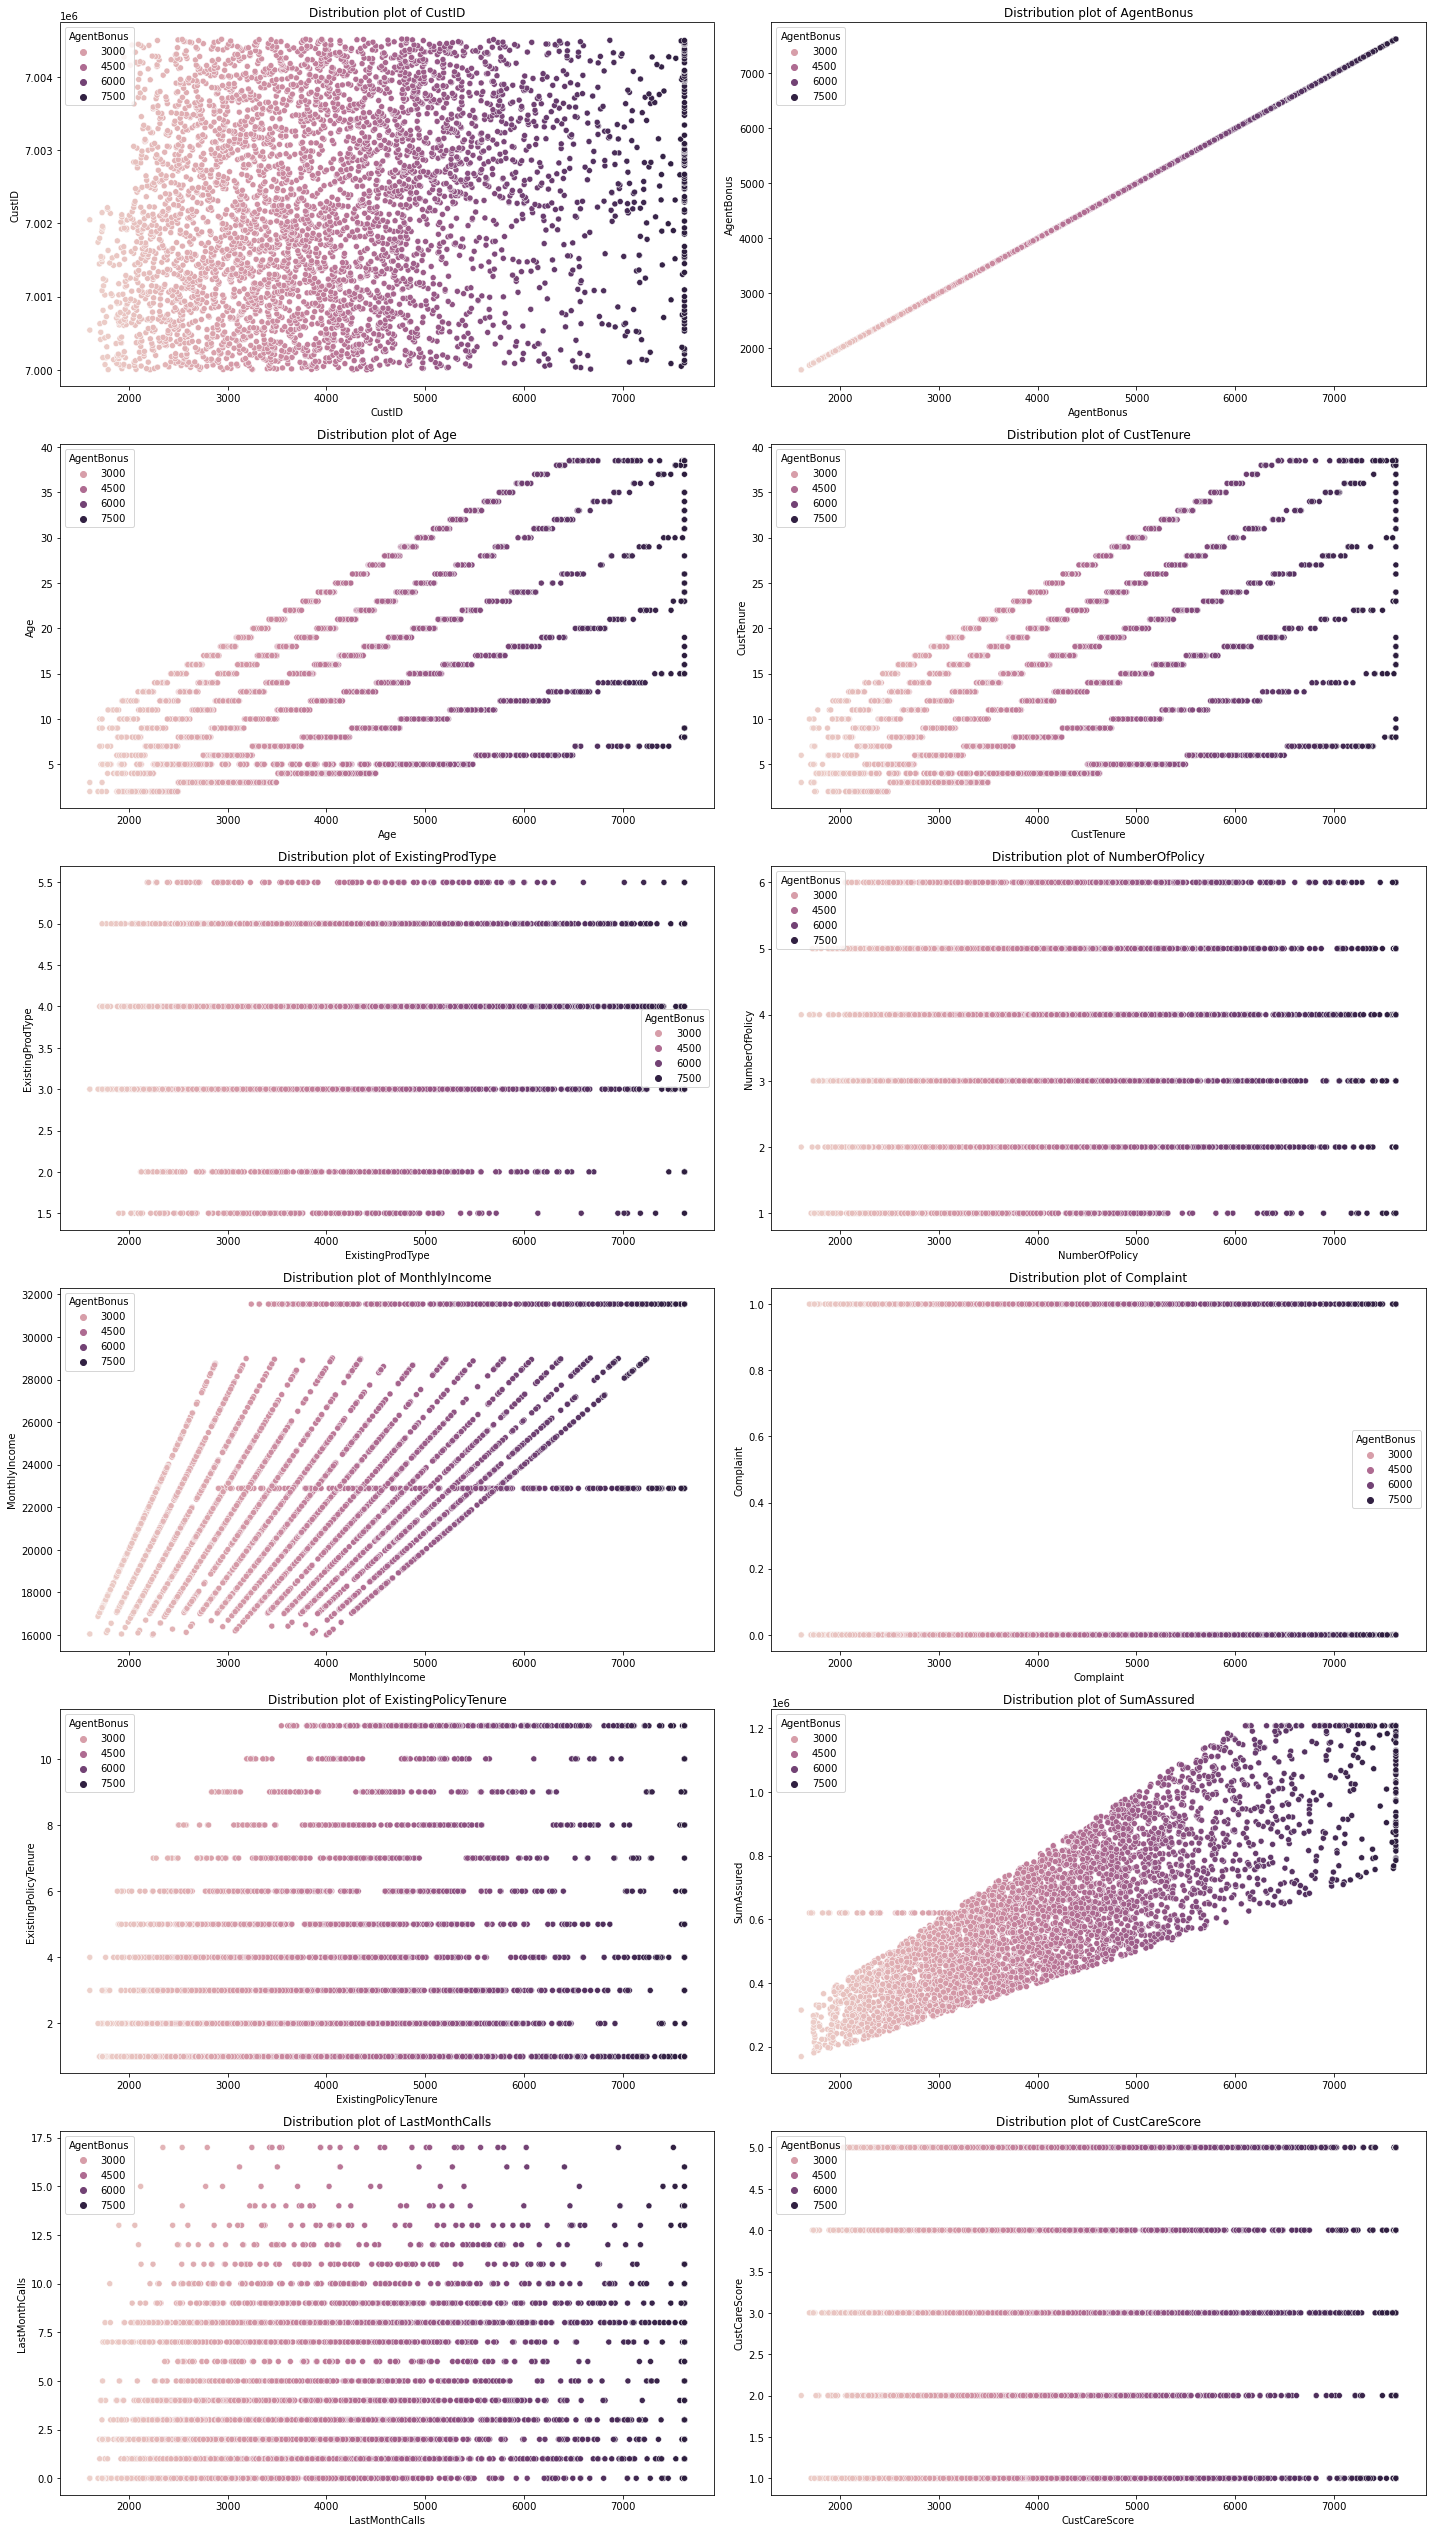

In [76]:
a = len(sales.select_dtypes(exclude= 'object').columns)  # represents number of rows
b = 2  # represents number of columns
c = 1  # initialize plot counter

fig1 = plt.figure(figsize=(20,70))

for i in sales.select_dtypes(exclude= 'object').columns:
    plt.subplot(a, b, c)
    plt.title('Distribution plot of {}'.format(i))
    plt.xlabel(i)
    sns.scatterplot('AgentBonus',sales[i],data=sales,hue='AgentBonus')
    c = c + 1
plt.tight_layout()
plt.show()

#### Examining different variables in the Dataset

<AxesSubplot:xlabel='Age', ylabel='count'>

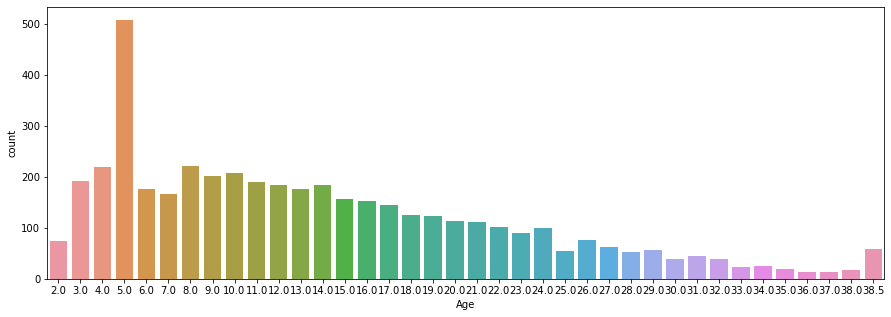

In [77]:
# Plotting the bar graph for the variable 'Age'

plt.figure(figsize=(15,5))
sns.countplot(sales['Age'])

<AxesSubplot:xlabel='Zone', ylabel='count'>

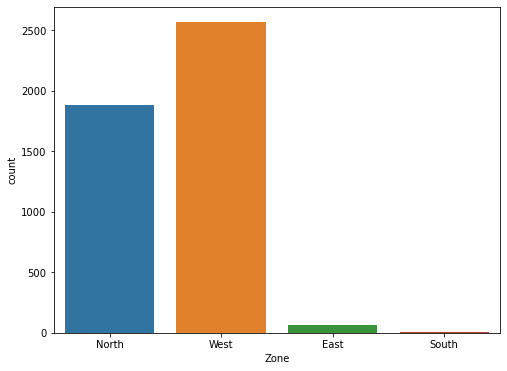

In [78]:
# Plotting the bar plots for the variable Zone vs Counts
plt.figure(figsize=(8,6))
sns.countplot(sales['Zone'])

<AxesSubplot:xlabel='CustTenure', ylabel='count'>

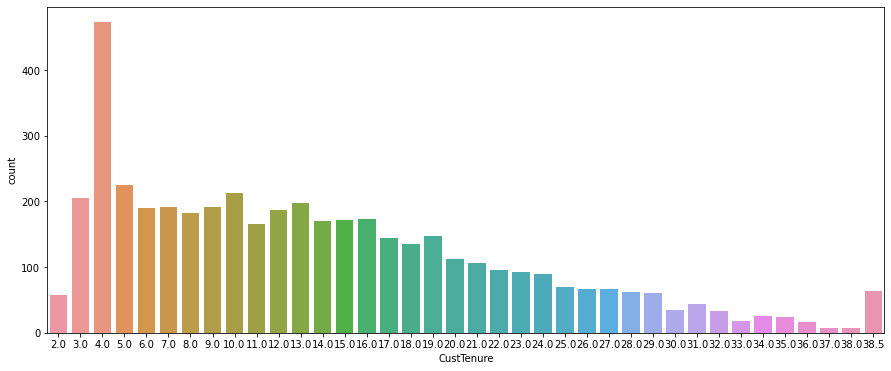

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(sales['CustTenure'])

<AxesSubplot:xlabel='Channel', ylabel='count'>

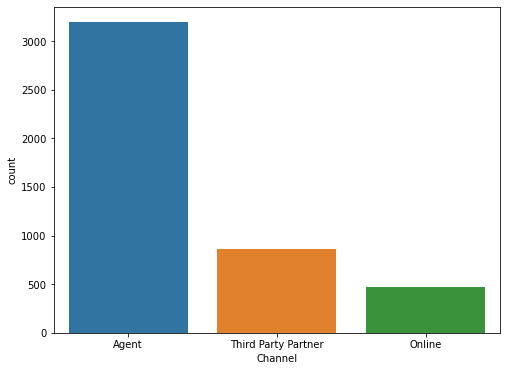

In [80]:
# Plotting the bar plots for the channel i.e. the medium .
plt.figure(figsize=(8,6))
sns.countplot(sales['Channel'])

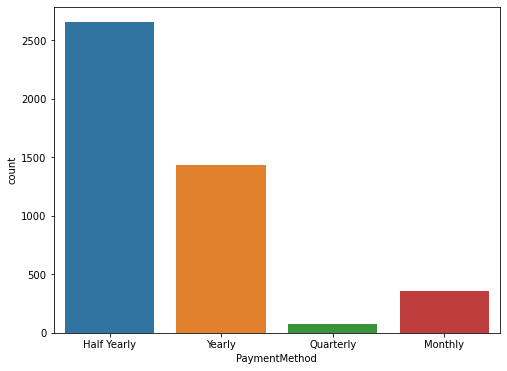

In [81]:
# Ploting the bar plots to visualise the pattern of poyments the customer has done.

plt.figure(figsize=(8,6))
sns.countplot(sales['PaymentMethod'])
labels = ['Half Yearly 0','Monthly 1']

<AxesSubplot:xlabel='ExistingPolicyTenure', ylabel='count'>

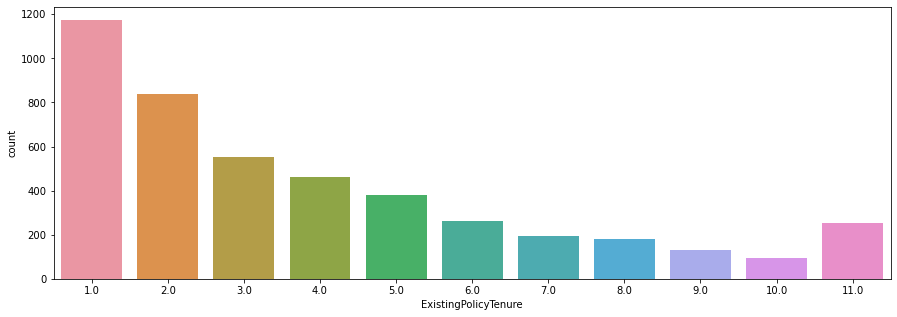

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(sales['ExistingPolicyTenure'])

In [83]:
# We've to understand that 'Customer id' is insignificant for further analysis as it has not use for analyzing the data. 
# So, dropping the 'Customer id' column from the data.

sales.drop(['CustID'], axis=1, inplace=True)

In [84]:
sales = pd.get_dummies(sales, columns=lstcategoriccolumns,drop_first=True)

In [85]:
# Check the data to reconfirm if the changes has been made correctly. 

sales.head()

AgentBonus   Age  CustTenure  ExistingProdType  NumberOfPolicy  \
0      4409.0  22.0         4.0               3.0             2.0   
1      2214.0  11.0         2.0               4.0             4.0   
2      4273.0  26.0         4.0               4.0             3.0   
3      1791.0  11.0         4.0               3.0             3.0   
4      2955.0   6.0         4.0               3.0             4.0   

   MonthlyIncome  Complaint  ExistingPolicyTenure     SumAssured  \
0        20993.0        1.0                   2.0  806761.000000   
1        20130.0        0.0                   3.0  294502.000000   
2        17090.0        1.0                   2.0  619999.699267   
3        17909.0        1.0                   2.0  268635.000000   
4        18468.0        0.0                   4.0  366405.000000   

   LastMonthCalls  ...  Designation_VP  MaritalStatus_Married  \
0             5.0  ...               0                      0   
1             7.0  ...               0                      0   
2             0.0  ...               0                      0   
3             0.0  ...               0                      0   
4             2.0  ...               0                      0   

   MaritalStatus_Single  MaritalStatus_Unmarried  Zone_North  Zone_South  \
0                     1                        0           1           0   
1                     0                        0           1           0   
2                     0                        1           1           0   
3                     0                        0           0           0   
4                     0                        0           0           0   

   Zone_West  PaymentMethod_Monthly  PaymentMethod_Quarterly  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          1                      0                        0   
4          1                      0                        0   

   PaymentMethod_Yearly  
0                     0  
1                     1  
2                     1  
3                     0  
4                     0  

[5 rows x 39 columns]

Since, we know that 'payment method' is a Categorical variable and for better results and to transform non-numerical to numerical variables we have used here "Label Encoding". That's the reason why Payment method appears here as 1,2 and 3 or else it would have appeared Payment_monthly, Payment_Quarterly, Payment_yearly.

In [86]:
# Data info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AgentBonus                     4520 non-null   float64
 1   Age                            4520 non-null   float64
 2   CustTenure                     4520 non-null   float64
 3   ExistingProdType               4520 non-null   float64
 4   NumberOfPolicy                 4520 non-null   float64
 5   MonthlyIncome                  4520 non-null   float64
 6   Complaint                      4520 non-null   float64
 7   ExistingPolicyTenure           4520 non-null   float64
 8   SumAssured                     4520 non-null   float64
 9   LastMonthCalls                 4520 non-null   float64
 10  CustCareScore                  4520 non-null   float64
 11  Channel_Online                 4520 non-null   uint8  
 12  Channel_Third Party Partner    4520 non-null   u

In [87]:
# Data description
sales.describe()

AgentBonus          Age   CustTenure  ExistingProdType  \
count  4520.000000  4520.000000  4520.000000       4520.000000   
mean   4062.773894    13.855863    13.865265          3.695575   
std    1358.284526     8.800660     8.765148          0.936418   
min    1605.000000     2.000000     2.000000          1.500000   
25%    3027.750000     6.000000     6.000000          3.000000   
50%    3911.500000    12.000000    12.000000          4.000000   
75%    4867.250000    19.000000    19.000000          4.000000   
max    7626.500000    38.500000    38.500000          5.500000   

       NumberOfPolicy  MonthlyIncome    Complaint  ExistingPolicyTenure  \
count     4520.000000    4520.000000  4520.000000           4520.000000   
mean         3.569690   22574.032557     0.287168              3.876327   
std          1.449302    3948.153973     0.452491              2.954770   
min          1.000000   16009.000000     0.000000              1.000000   
25%          2.000000   19858.000000     0.000000              1.000000   
50%          4.000000   21877.000000     0.000000              3.000000   
75%          5.000000   24531.750000     1.000000              5.000000   
max          6.000000   31542.375000     1.000000             11.000000   

         SumAssured  LastMonthCalls  ...  Designation_VP  \
count  4.520000e+03     4520.000000  ...     4520.000000   
mean   6.159023e+05        4.624336  ...        0.050000   
std    2.292554e+05        3.610676  ...        0.217969   
min    1.685360e+05        0.000000  ...        0.000000   
25%    4.444762e+05        2.000000  ...        0.000000   
50%    5.900125e+05        3.000000  ...        0.000000   
75%    7.500105e+05        8.000000  ...        0.000000   
max    1.208312e+06       17.000000  ...        1.000000   

       MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Unmarried  \
count            4520.000000           4520.000000               4520.00000   
mean                0.501770              0.277434                  0.04292   
std                 0.500052              0.447782                  0.20270   
min                 0.000000              0.000000                  0.00000   
25%                 0.000000              0.000000                  0.00000   
50%                 1.000000              0.000000                  0.00000   
75%                 1.000000              1.000000                  0.00000   
max                 1.000000              1.000000                  1.00000   

        Zone_North   Zone_South    Zone_West  PaymentMethod_Monthly  \
count  4520.000000  4520.000000  4520.000000            4520.000000   
mean      0.416814     0.001327     0.567699               0.078319   
std       0.493086     0.036414     0.495450               0.268702   
min       0.000000     0.000000     0.000000               0.000000   
25%       0.000000     0.000000     0.000000               0.000000   
50%       0.000000     0.000000     1.000000               0.000000   
75%       1.000000     0.000000     1.000000               0.000000   
max       1.000000     1.000000     1.000000               1.000000   

       PaymentMethod_Quarterly  PaymentMethod_Yearly  
count              4520.000000           4520.000000  
mean                  0.016814              0.317257  
std                   0.128589              0.465460  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   0.000000              0.000000  
75%                   0.000000              1.000000  
max                   1.000000              1.000000  

[8 rows x 39 columns]

In [88]:
# Check null values 
sales.isnull().sum()

AgentBonus                       0
Age                              0
CustTenure                       0
ExistingProdType                 0
NumberOfPolicy                   0
MonthlyIncome                    0
Complaint                        0
ExistingPolicyTenure             0
SumAssured                       0
LastMonthCalls                   0
CustCareScore                    0
Channel_Online                   0
Channel_Third Party Partner      0
Occupation_Laarge Business       0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
EducationField_Engineer          0
EducationField_Graduate          0
EducationField_MBA               0
EducationField_Post Graduate     0
EducationField_UG                0
EducationField_Under Graduate    0
Gender_Female                    0
Gender_Male                      0
Designation_Exe                  0
Designation_Executive            0
Designation_Manager              0
Designation_Senior M

We don't find missing values any more

In [89]:
# Splitting the available data into Train and Test data.

X = sales.drop(['AgentBonus'], axis=1)
y = sales['AgentBonus']

In [90]:
# Splitting the X and y data into Training and Test set into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [91]:
# Now finding out the data available for Train and Test.

print('Train data',X_train.shape)
print('Test Data',X_test.shape)

Train data (3390, 38)
Test Data (1130, 38)


#### Linear Regression

In [92]:
# Using linear regression to find the best fid model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [93]:
# R square on training data
regression_model.score(X_train, y_train)

0.809122424509397

In [94]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7814619738647623

In [95]:
# Root Mean Square Error on Training data

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

596.9929773590675

In [96]:
# Root Mean Square Error on Testing data

predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

623.1013445806033

In [97]:
# Now concatenating the elements of X and Y into a single DataFrame.

data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

Age  CustTenure  ExistingProdType  NumberOfPolicy  MonthlyIncome  \
693   17.0        15.0               3.0             2.0   22379.000000   
3521  18.0        14.0               5.0             5.0   22890.309991   
3789  27.0        11.0               4.0             2.0   21776.000000   
2051   4.0         4.0               3.0             3.0   17821.000000   
2404  15.0        15.0               5.0             3.0   23139.000000   

      Complaint  ExistingPolicyTenure  SumAssured  LastMonthCalls  \
693         0.0                   1.0    570217.0             4.0   
3521        0.0                   2.0    398096.0            11.0   
3789        0.0                   4.0   1034360.0             8.0   
2051        0.0                   9.0    568846.0             2.0   
2404        0.0                   1.0    704583.0             2.0   

      CustCareScore  ...  MaritalStatus_Married  MaritalStatus_Single  \
693             2.0  ...                      1                     0   
3521            5.0  ...                      1                     0   
3789            3.0  ...                      1                     0   
2051            3.0  ...                      1                     0   
2404            3.0  ...                      0                     1   

      MaritalStatus_Unmarried  Zone_North  Zone_South  Zone_West  \
693                         0           0           0          1   
3521                        0           0           0          1   
3789                        0           1           0          0   
2051                        0           0           0          1   
2404                        0           0           0          1   

      PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  \
693                       0                        0                     0   
3521                      0                        0                     1   
3789                      0                        0                     0   
2051                      0                        0                     0   
2404                      0                        0                     1   

      AgentBonus  
693       2909.0  
3521      3523.0  
3789      5444.0  
2051      3742.0  
2404      4859.0  

[5 rows x 39 columns]

In [98]:
# Highlighting all the column names which we have used as Training data.
data_train.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Laarge Business',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post Graduate', 'EducationField_UG',
       'EducationField_Under Graduate', 'Gender_Female', 'Gender_Male',
       'Designation_Exe', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [99]:
# Now renaming the columns by reducing the space between their names. 

data_train.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business" , "EducationField_Post Graduate" : "EducationField_Post_Graduate",
                            "EducationField_Under Graduate":"EducationField_Under_Graduate",
                            "Designation_Senior Manager":"Designation_Senior_Manager"}, 
                      inplace = True)

data_test.rename(columns = {"Channel_Third Party Partner": "Channel_Third_Party_Partner", "Occupation_Large Business": "Occupation_Large_Business", 
                     "Occupation_Small Business": "Occupation_Small_Business" , "EducationField_Post Graduate" : "EducationField_Post_Graduate",
                            "EducationField_Under Graduate":"EducationField_Under_Graduate",
                           "Designation_Senior Manager":"Designation_Senior_Manager"},
                      inplace = True)

In [100]:
# Now checking the changes made on the column names. 
data_train.columns

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third_Party_Partner', 'Occupation_Laarge Business',
       'Occupation_Large_Business', 'Occupation_Salaried',
       'Occupation_Small_Business', 'EducationField_Engineer',
       'EducationField_Graduate', 'EducationField_MBA',
       'EducationField_Post_Graduate', 'EducationField_UG',
       'EducationField_Under_Graduate', 'Gender_Female', 'Gender_Male',
       'Designation_Exe', 'Designation_Executive', 'Designation_Manager',
       'Designation_Senior_Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Zone_North',
       'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [101]:
#  Exponential values
exp='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + EducationField_Engineer + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + MaritalStatus_Married + MaritalStatus_Single + MaritalStatus_Unmarried + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'


In [102]:
# Checking the linear model 1 parameters

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= exp, data = data_train).fit()
lm1.params

Intercept                       -308.862450
Age                               21.584280
CustTenure                        22.798862
ExistingProdType                 -74.096130
NumberOfPolicy                     0.098293
MonthlyIncome                      0.072213
Complaint                         29.571853
ExistingPolicyTenure              38.259870
SumAssured                         0.003531
LastMonthCalls                     0.647778
CustCareScore                      8.629110
Channel_Online                    24.987669
Channel_Third_Party_Partner       -3.289607
Occupation_Large_Business        -27.616164
Occupation_Salaried               -0.407712
Occupation_Small_Business         -0.459524
EducationField_Engineer          -17.658530
EducationField_MBA              -127.483172
EducationField_Post_Graduate      12.804460
EducationField_Under_Graduate    -33.509031
Gender_Male                       15.167335
Designation_Executive            105.419991
Designation_Manager             

In [103]:
# Printing the summary for the same
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     410.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:54:23   Log-Likelihood:                -26546.
No. Observations:                3390   AIC:                         5.316e+04
Df Residuals:                    3356   BIC:                         5.337e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [104]:
# Calculating Mean Square Error (MSE)
mse = np.mean((lm1.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [105]:
# Root Mean Square Error (RMSE)
np.sqrt(mse)

608.9209880058388

In [106]:
exp1='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online  + EducationField_Engineer + EducationField_MBA + EducationField_Post_Graduate + Gender_Male + Designation_Manager + Designation_Senior_Manager  + MaritalStatus_Married + MaritalStatus_Single + MaritalStatus_Unmarried + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'


In [107]:
# Checking the linear model 2 parameters

import statsmodels.formula.api as smf
lm2 = smf.ols(formula= exp1, data = data_train).fit()
lm2.params

Intercept                      -134.512039
Age                              21.480889
CustTenure                       22.627846
ExistingProdType                -60.182839
NumberOfPolicy                    0.651886
MonthlyIncome                     0.067571
Complaint                        29.679669
ExistingPolicyTenure             38.701215
SumAssured                        0.003515
LastMonthCalls                    0.036937
CustCareScore                     9.095713
Channel_Online                   22.258761
EducationField_Engineer         -21.699018
EducationField_MBA             -118.147848
EducationField_Post_Graduate     20.266736
Gender_Male                      18.373475
Designation_Manager            -147.168605
Designation_Senior_Manager      -68.057342
MaritalStatus_Married           -51.562084
MaritalStatus_Single             16.745167
MaritalStatus_Unmarried        -150.330458
Zone_South                      156.922437
Zone_West                        -4.834612
PaymentMeth

In [108]:
# Checking the variance inflation factor values

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [109]:
vif_cal(input_data=data_train.drop('AgentBonus',axis=1))

Age  VIF =  1.41
CustTenure  VIF =  1.38
ExistingProdType  VIF =  4.75
NumberOfPolicy  VIF =  1.12
MonthlyIncome  VIF =  5.24
Complaint  VIF =  1.01
ExistingPolicyTenure  VIF =  1.12
SumAssured  VIF =  1.76
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.03
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
Occupation_Laarge Business  VIF =  62.39
Occupation_Large_Business  VIF =  101.63
Occupation_Salaried  VIF =  432.81
Occupation_Small_Business  VIF =  440.93
EducationField_Engineer  VIF =  18.07
EducationField_Graduate  VIF =  17.29
EducationField_MBA  VIF =  2.0
EducationField_Post_Graduate  VIF =  4.44
EducationField_UG  VIF =  1.57
EducationField_Under_Graduate  VIF =  2.58
Gender_Female  VIF =  4.77
Gender_Male  VIF =  4.54
Designation_Exe  VIF =  2.3
Designation_Executive  VIF =  8.62
Designation_Manager  VIF =  6.08
Designation_Senior_Manager  VIF =  2.82
Designation_VP  VIF =  1.84
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.89
Mari

So above is the the variance inflation factor values which influence the variable 'AgentBonus'.

In [110]:
vif_cal(input_data=data_train.drop(['AgentBonus','Occupation_Small_Business','Zone_North','Occupation_Large_Business','EducationField_Under_Graduate','Designation_VP','Occupation_Salaried','Designation_Executive','Channel_Third_Party_Partner'],axis=1))


Age  VIF =  1.4
CustTenure  VIF =  1.37
ExistingProdType  VIF =  3.73
NumberOfPolicy  VIF =  1.11
MonthlyIncome  VIF =  1.98
Complaint  VIF =  1.01
ExistingPolicyTenure  VIF =  1.11
SumAssured  VIF =  1.74
LastMonthCalls  VIF =  1.18
CustCareScore  VIF =  1.02
Channel_Online  VIF =  1.02
Occupation_Laarge Business  VIF =  1.58
EducationField_Engineer  VIF =  1.68
EducationField_Graduate  VIF =  1.26
EducationField_MBA  VIF =  1.04
EducationField_Post_Graduate  VIF =  1.09
EducationField_UG  VIF =  1.26
Gender_Female  VIF =  4.74
Gender_Male  VIF =  4.51
Designation_Exe  VIF =  1.19
Designation_Manager  VIF =  1.22
Designation_Senior_Manager  VIF =  1.29
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.88
MaritalStatus_Unmarried  VIF =  1.36
Zone_South  VIF =  1.01
Zone_West  VIF =  1.02
PaymentMethod_Monthly  VIF =  1.98
PaymentMethod_Quarterly  VIF =  1.1
PaymentMethod_Yearly  VIF =  2.11


In [111]:
# Summary of linear model 2
lm2 = smf.ols(formula= exp1, data = data_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     541.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:54:28   Log-Likelihood:                -26550.
No. Observations:                3390   AIC:                         5.315e+04
Df Residuals:                    3364   BIC:                         5.331e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [112]:
## Prediction on Training and Test set

y_pred_1_Train = lm1.fittedvalues
y_pred_2_Train = lm2.fittedvalues


y_pred_1_Test = lm1.predict(data_test)
y_pred_2_Test = lm2.predict(data_test)

In [113]:
## Root Mean Square Error calculation on both Training set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_1_Train,squared=False))
print('RMSE on Training Set for Model 2:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_2_Train,squared=False))

RMSE on Training Set for Model 1: 608.9209880058394
RMSE on Training Set for Model 2: 609.6576596195792


In [114]:
## Root Mean Square Error calculation on Test set

print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_1_Test,squared=False))
print('RMSE on Test Set for Model 2:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_2_Test,squared=False))

RMSE on Test Set for Model 1: 633.9595739888327
RMSE on Test Set for Model 2: 632.831038053911


In [115]:
# Now copying all the predictor variables except target variable into X dataframe
X = sales.drop('AgentBonus', axis=1)

# Copying here the target variable setting aside all the training variables. into the Y dataframe.
y = sales[['AgentBonus']]

#### Examining the best fit models

In [116]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.25)

In [117]:
# Scaling the data for Artificial Neural Netwrok. If we don't do scaling it may give poor results.
# Basically Scaling is the process which makes the data computations easier

ss=StandardScaler() 
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [118]:
rf=RandomForestClassifier()
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=1000)
# We can also tweak the layer sizes accordingly

rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
# Scaling the data for Artificial Neural Network. If we don't do Scaling we won't have good results.  
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
            i.fit(x_train_scaled,y_train)
            scores_train.append(i.score(x_train_scaled, y_train))
            scores_test.append(i.score(x_test_scaled, y_test))
            rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
            rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor','ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        608.208934  590.392992        0.803620    0.798161
Decision Tree Regressor    0.000000  760.245991        1.000000    0.665318
Random Forest Regressor  190.483906  519.251378        0.980738    0.843873
ANN Regressor            497.488121  606.842724        0.868612    0.786756


#### Grid Search on Decision Tree

In [119]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 50}


#### Grid Search on Random Forest

In [120]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [121]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [122]:
# Looking for best parameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


#### Grid Search on ANN

In [123]:
# Using Grid Search for ANN

param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    
    
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [124]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [125]:
# Looking again for best parameters
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'adam'}


In [126]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='adam',random_state=123, 
                    max_iter=1000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        608.208934  590.392992        0.803620    0.798161
Decision Tree Regressor  495.236822  573.495484        0.869798    0.809549
Random Forest Regressor  540.850048  583.163906        0.844709    0.803073
ANN Regressor            497.488121  606.842724        0.868612    0.786756


In [127]:
print (pd.DataFrame(rfr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                    Imp
SumAssured                     0.430643
CustTenure                     0.147939
Age                            0.135314
MonthlyIncome                  0.122517
ExistingPolicyTenure           0.035902
Designation_VP                 0.031614
Designation_Executive          0.023948
Designation_Manager            0.013429
LastMonthCalls                 0.012173
Designation_Senior Manager     0.007222
Designation_Exe                0.004794
ExistingProdType               0.004702
MaritalStatus_Unmarried        0.003864
NumberOfPolicy                 0.003687
Gender_Female                  0.002636
CustCareScore                  0.002612
EducationField_UG              0.001531
EducationField_Under Graduate  0.001157
MaritalStatus_Married          0.001078
Zone_North                     0.001078
Zone_West                      0.001074
MaritalStatus_Single           0.001051
Gender_Male                    0.001030
Complaint                      0.001022


In [128]:
# Covariance Matrix

cov_matrix = np.cov(sales.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.84493685e+06  6.69771508e+03  6.65892831e+03 ... -2.71375490e+00
  -1.51489620e+00 -6.17078197e+00]
 [ 6.69771508e+03  7.74516142e+01  2.55636137e+01 ... -4.75225547e-03
   9.72658216e-03  2.25033634e-02]
 [ 6.65892831e+03  2.55636137e+01  7.68278262e+01 ... -4.52099983e-02
  -2.27395833e-02 -6.43301537e-05]
 ...
 [-2.71375490e+00 -4.75225547e-03 -4.52099983e-02 ...  7.22007571e-02
  -1.31715255e-03 -2.48525890e-02]
 [-1.51489620e+00  9.72658216e-03 -2.27395833e-02 ... -1.31715255e-03
   1.65351015e-02 -5.33558407e-03]
 [-6.17078197e+00  2.25033634e-02 -6.43301537e-05 ... -2.48525890e-02
  -5.33558407e-03  2.16652795e-01]]


In [129]:
# Now finding Eigen values and Eigen vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-4.96868364e-03 -8.47763654e-02  9.96377273e-01 ...  7.74188358e-06
   4.54913220e-06 -4.12247956e-06]
 [-1.83436629e-05 -4.59698025e-04  3.09133377e-03 ... -2.94485504e-05
  -1.31935556e-04 -3.76622203e-04]
 [-1.82075852e-05 -4.16254708e-04  3.18495983e-03 ...  3.13657941e-04
  -9.60911455e-06 -1.63276585e-04]
 ...
 [ 2.77466493e-08  1.73400211e-06  1.38987894e-05 ... -5.51772304e-02
  -9.62691825e-02  2.63483812e-01]
 [ 1.03840534e-08 -1.50060355e-07  2.26132609e-06 ...  2.54654857e-02
   1.00983201e-01 -2.45627486e-01]
 [ 1.23612622e-08 -1.15357663e-06 -9.08688890e-06 ...  1.62162890e-02
   7.17960192e-02 -9.55980953e-02]]

 Eigen Values 
%s [5.25624773e+10 1.25438878e+07 4.60460909e+05 5.37255287e+01
 5.15606382e+01 1.14652690e+01 7.78447605e+00 2.07921782e+00
 1.89030258e+00 9.49773376e-01 7.20262245e-01 4.84051024e-01
 4.29079835e-01 3.56045573e-01 3.22300861e-01 2.04121114e-01
 2.01244389e-01 1.57299406e-01 1.48911795e-01 1.18219969e-01
 9.67008128e-02 9.3977

In [130]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 99.97526512  99.99912394  99.99999975  99.99999985  99.99999995
  99.99999997  99.99999998  99.99999999  99.99999999  99.99999999
  99.99999999 100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.        ]


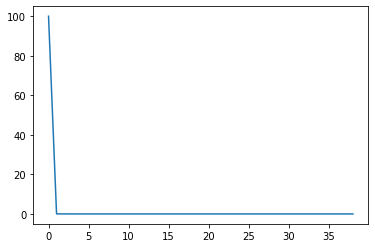

In [131]:
plt.plot(var_exp)

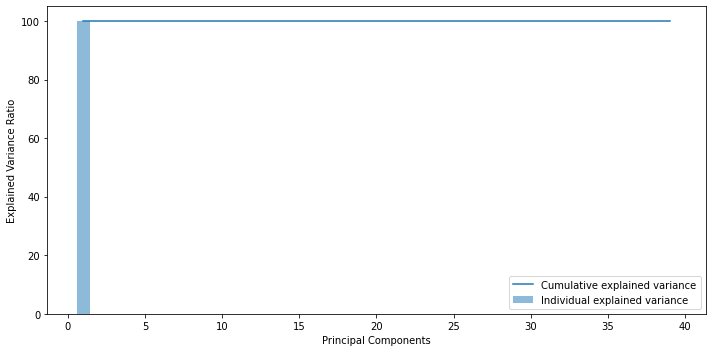

In [132]:
# Ploting

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [133]:
# Here Scikit learn with the help of PCA does all the above steps and maps the data to PCA dimensions in one go.
from sklearn.decomposition import PCA 

# We are generating only 7 PCA dimensions (dimensionality reduced from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(sales)
data_reduced.transpose()

array([[ 1.90840212e+05, -3.21414771e+05,  4.05597862e+03, ...,
         5.14676654e+04,  3.28067312e+05,  8.44152829e+04],
       [-3.09425705e+03,  1.54335034e+01, -5.47952537e+03, ...,
        -1.25353335e+02, -5.09472478e+03,  6.16153022e+02],
       [-3.40928482e+02, -2.53998552e+02,  6.56993278e+02, ...,
        -5.17687765e+02, -4.46580641e+02,  2.30363328e+02],
       ...,
       [-1.28730414e+01, -6.40627787e+00, -1.56980444e+01, ...,
         5.27216588e-01, -4.25693286e-01, -3.04040461e+00],
       [ 6.27970232e-01,  3.20705106e+00, -3.21182833e+00, ...,
        -1.04393533e+00, -2.46820887e+00, -4.13756946e+00],
       [-2.52183733e+00, -7.28775916e-02, -2.14430852e+00, ...,
        -1.45636526e+00,  1.55273254e+00, -6.70165041e-01]])

In [134]:
# Now Checking the length of components
len(pca.components_)

7

In [135]:
sales_comp = pd.DataFrame(pca.components_,columns=list(sales))
sales_comp.head()

AgentBonus       Age  CustTenure  ExistingProdType  NumberOfPolicy  \
0    0.004969  0.000018    0.000018      4.096192e-07    3.963344e-07   
1    0.084776  0.000460    0.000416      4.809769e-05    5.363084e-05   
2    0.996377  0.003091    0.003185     -3.173989e-05   -1.025798e-05   
3    0.004471 -0.731552   -0.681598     -6.916058e-03   -4.214439e-03   
4   -0.000221 -0.681702    0.731607      2.273837e-03   -1.182040e-04   

   MonthlyIncome     Complaint  ExistingPolicyTenure    SumAssured  \
0       0.007719  4.066665e-09              0.000003  9.999579e-01   
1       0.996367 -1.491757e-07             -0.000039 -8.112389e-03   
2      -0.084815  1.665722e-05              0.000763 -4.296308e-03   
3       0.000246 -2.968038e-04             -0.003133  1.755570e-06   
4       0.000027 -4.786010e-04             -0.000014  6.789840e-08   

   LastMonthCalls  ...  Designation_VP  MaritalStatus_Married  \
0        0.000002  ...    2.597126e-07           9.509540e-08   
1        0.000330  ...    2.747013e-05           5.368982e-06   
2        0.000022  ...    4.735313e-06          -2.084629e-05   
3       -0.008939  ...    6.940800e-04           6.975936e-04   
4        0.001940  ...   -4.735274e-04           1.161504e-03   

   MaritalStatus_Single  MaritalStatus_Unmarried    Zone_North    Zone_South  \
0         -1.572729e-08            -9.357627e-08  4.259302e-08 -2.719102e-09   
1          6.042846e-06            -1.463639e-05 -3.473882e-06 -3.431926e-08   
2          2.194863e-05            -1.005169e-05 -2.771328e-06  7.640408e-08   
3         -1.707505e-03             1.336717e-03  1.177825e-03 -1.450078e-05   
4         -1.965948e-03             5.810595e-04  7.810681e-04  2.116658e-05   

      Zone_West  PaymentMethod_Monthly  PaymentMethod_Quarterly  \
0 -2.774497e-08          -2.774665e-08            -1.038405e-08   
1  2.289574e-06          -1.734002e-06             1.500604e-07   
2  9.804823e-07           1.389879e-05             2.261326e-06   
3 -1.075147e-03           2.268874e-04             2.721316e-06   
4 -8.255934e-04          -5.913588e-04            -4.476488e-04   

   PaymentMethod_Yearly  
0         -1.236126e-08  
1          1.153577e-06  
2         -9.086889e-06  
3         -8.271978e-04  
4         -2.580300e-04  

[5 rows x 39 columns]

<AxesSubplot:>

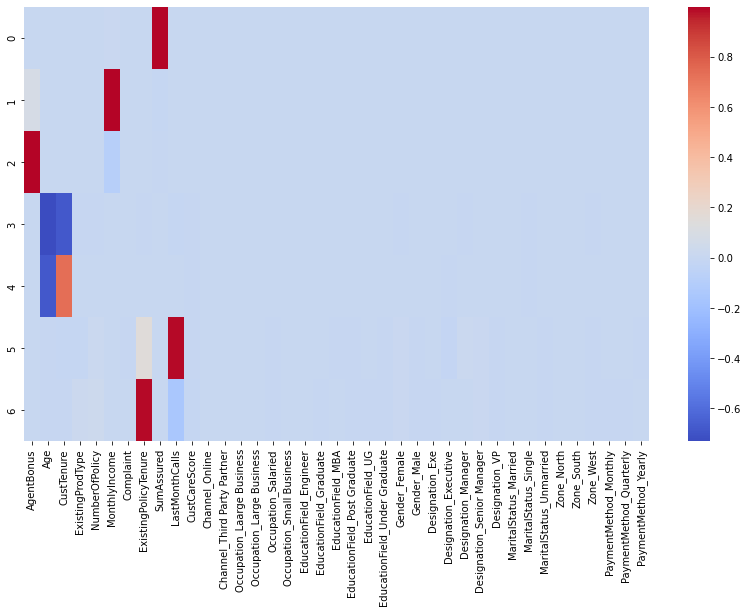

In [136]:
# Plotting a heat map for the same

plt.figure(figsize=(14,8))
sns.heatmap(sales_comp, cmap='coolwarm')